In [8]:
##Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from collections import OrderedDict
import sys
import csv
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib


# Reading and Global Pre-Processing

df_csv = pd.read_csv('/Users/cjbertumen/Desktop/Prototype Demonstration/11-07_Prototype-Demonstration-2.csv')

# df_csv['endTime'] = pd.to_datetime(df_csv['endTime']).dt.time
df_csv['endTime'] = pd.to_datetime(df_csv['endTime'])
df_csv['dateTime'] = matplotlib.dates.date2num(df_csv['endTime'])

# Declarations
weightSensor = []

# Grouping the dataset per weight sensor / product
df_sensorLocation = df_csv.groupby(["sensorNumber"])

# Seperate to arrays
for i in range(12):
    weightSensor.append([df_sensorLocation.get_group(i+1)])

cwd = os.getcwd()
os.chdir(cwd)
try:
    os.mkdir(cwd+"/"+str(filename.split(".")[0]))
except:
    pass

# Performance Report

In [9]:
## Performance Metric || Number of Fails per Weight Sensor

#Declarations
false_count_sensor = []
total_count_sensor = []


# Total Number of False
for i in range(12):
    weightSensor[i][0] = weightSensor[i][0].replace("False", "False ")
    weightSensor[i][0] = weightSensor[i][0].replace("FALSE", "False ")
    false_count_sensor.append(weightSensor[i][0][weightSensor[i][0]['weightValue'].eq("False ")]['weightValue'].count())

# # Total Number of Weight Sensor Data
for i in range(12):
    total_count_sensor.append(weightSensor[i][0]['weightValue'].count())

ratio_perentage = [(i/j)*100 for i,j in zip(false_count_sensor,total_count_sensor)]


weightSensorPerformance = {'Ratio (%)': ratio_perentage,
                              'Num of False': false_count_sensor,
                              'Total Count': total_count_sensor}

df_weightSensorPerformance = pd.DataFrame(weightSensorPerformance)
df_weightSensorPerformance.to_excel('./weightSensorPerformance.xlsx')
df_weightSensorPerformance

## For Additional Information 
# df_weightSensorPerformance.sum()
# df_weightSensorPerformance.describe()

,Ratio (%),Num of False,Total Count
0,0.0,0,42
1,0.0,0,43
2,0.0,0,44
3,0.0,0,43
4,0.0,0,43
5,0.0,0,44
6,0.0,0,41
7,0.0,0,44
8,0.0,0,44
9,0.0,0,44


/var/folders/kg/5gxzvb091vs8gx59d2qh6qp40000gn/T/ipykernel_50244/3830653258.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(weightSensor[i][0])
/var/folders/kg/5gxzvb091vs8gx59d2qh6qp40000gn/T/ipykernel_50244/3830653258.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(weightSensor[i][0])
/var/folders/kg/5gxzvb091vs8gx59d2qh6qp40000gn/T/ipykernel_50244/3830653258.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(weightSensor[i][0])
/var/folders/kg/5gxzvb091vs8gx59d2qh6qp40000gn/T/ipykernel_50244/3830653258.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

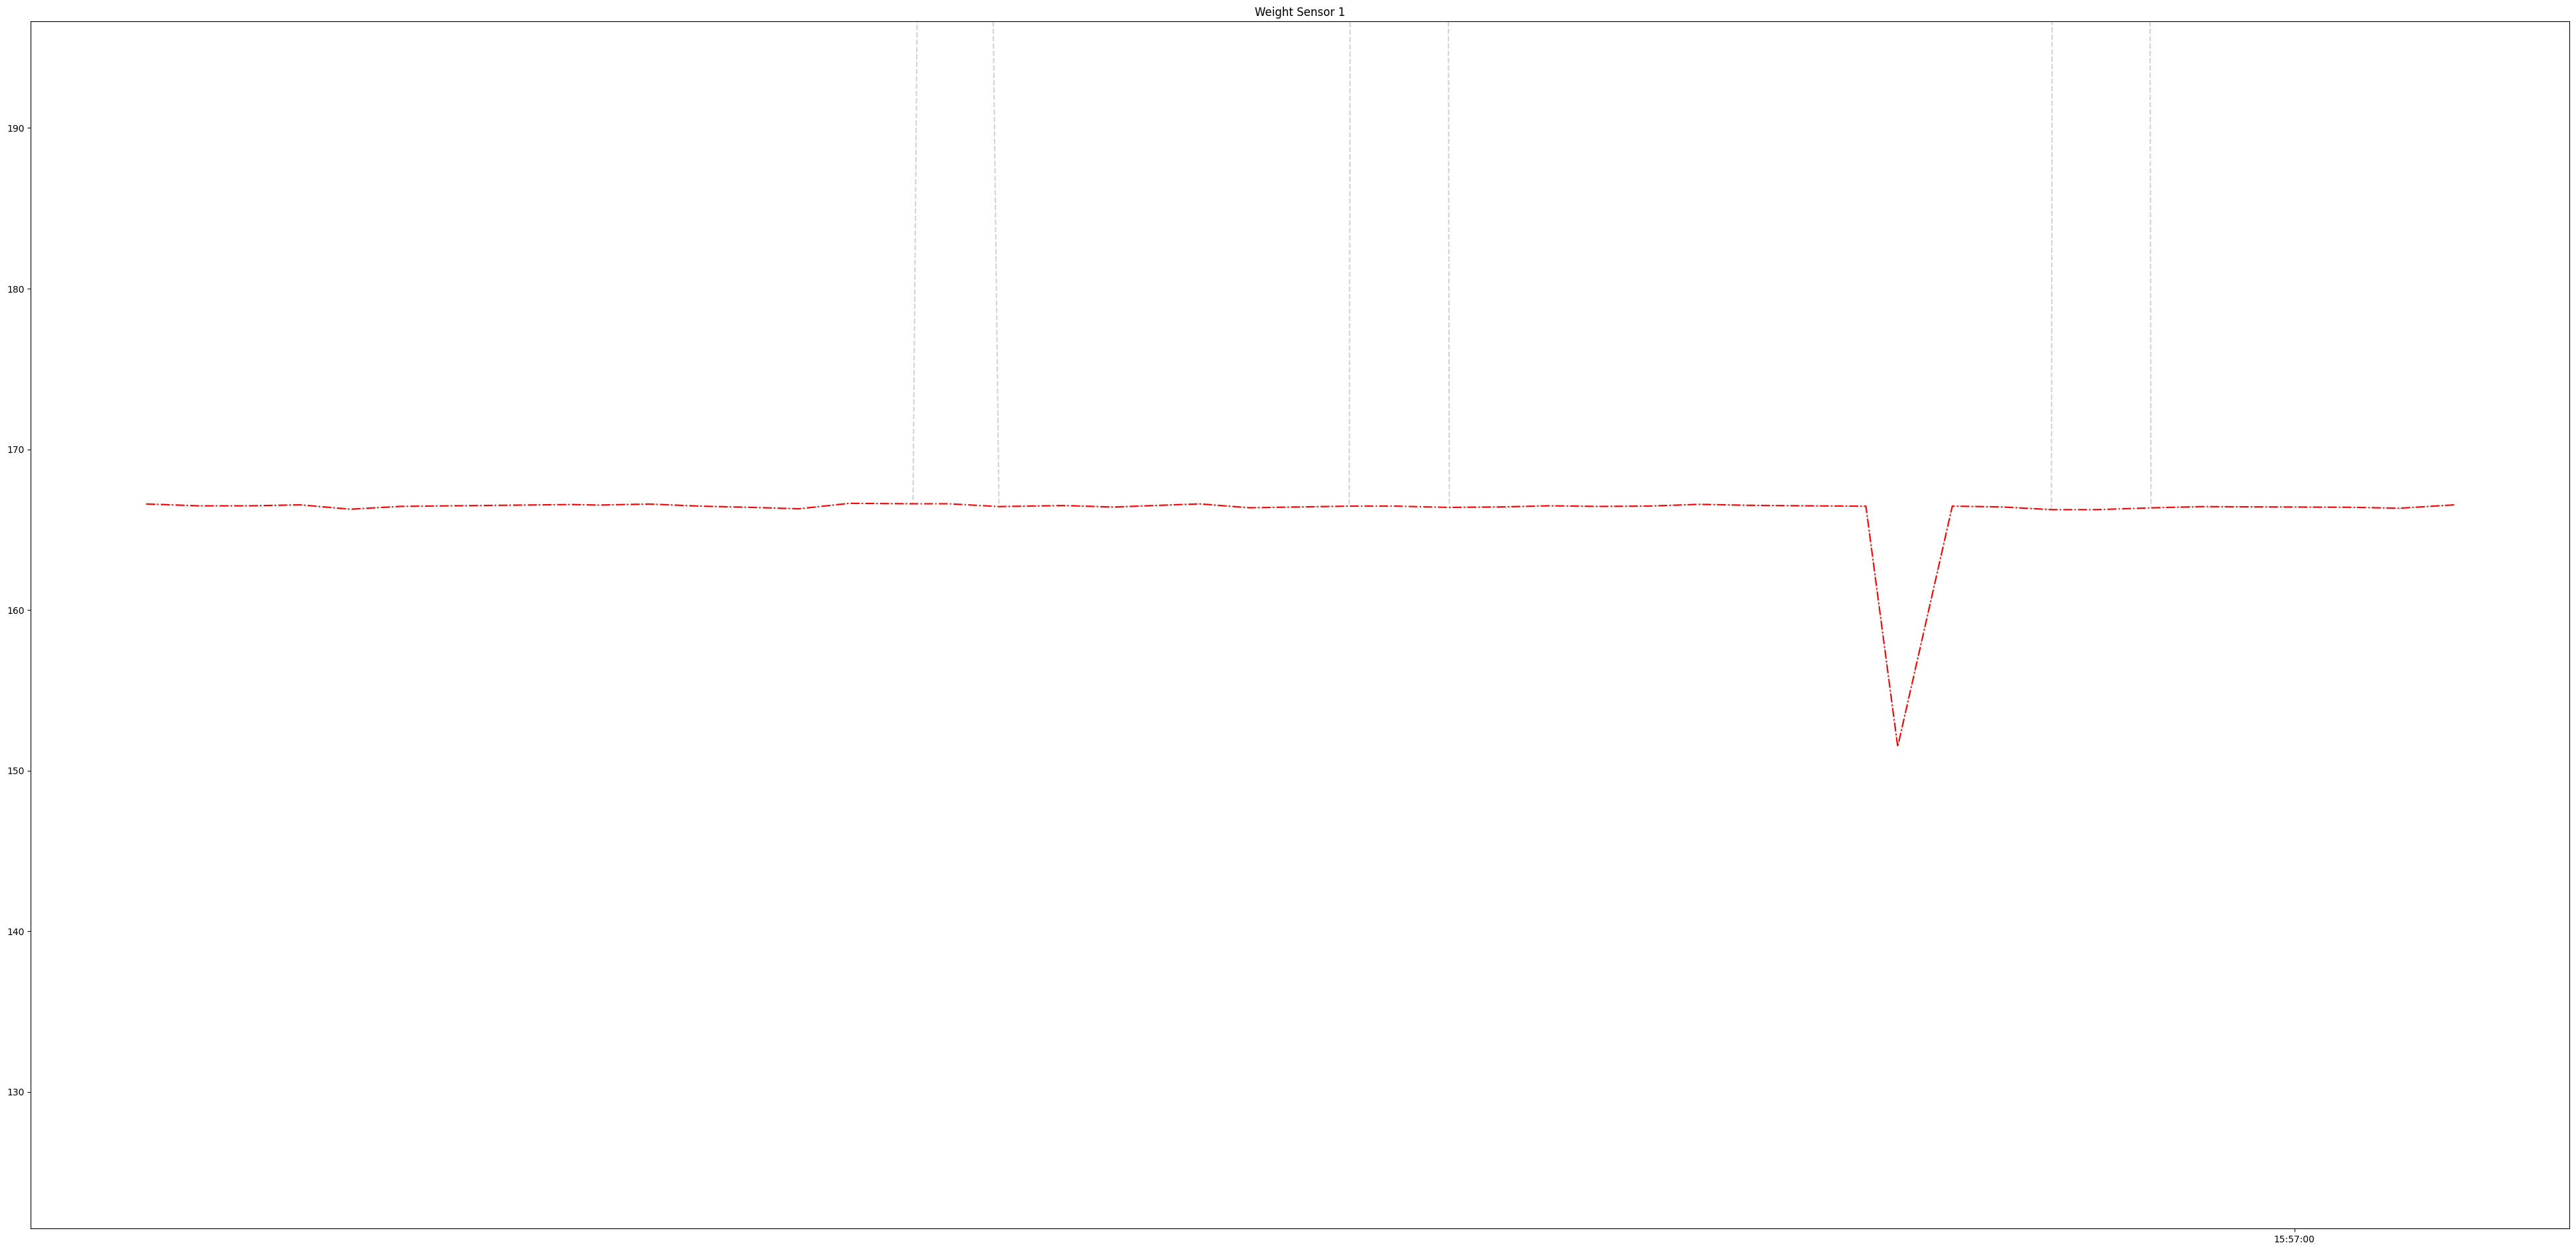

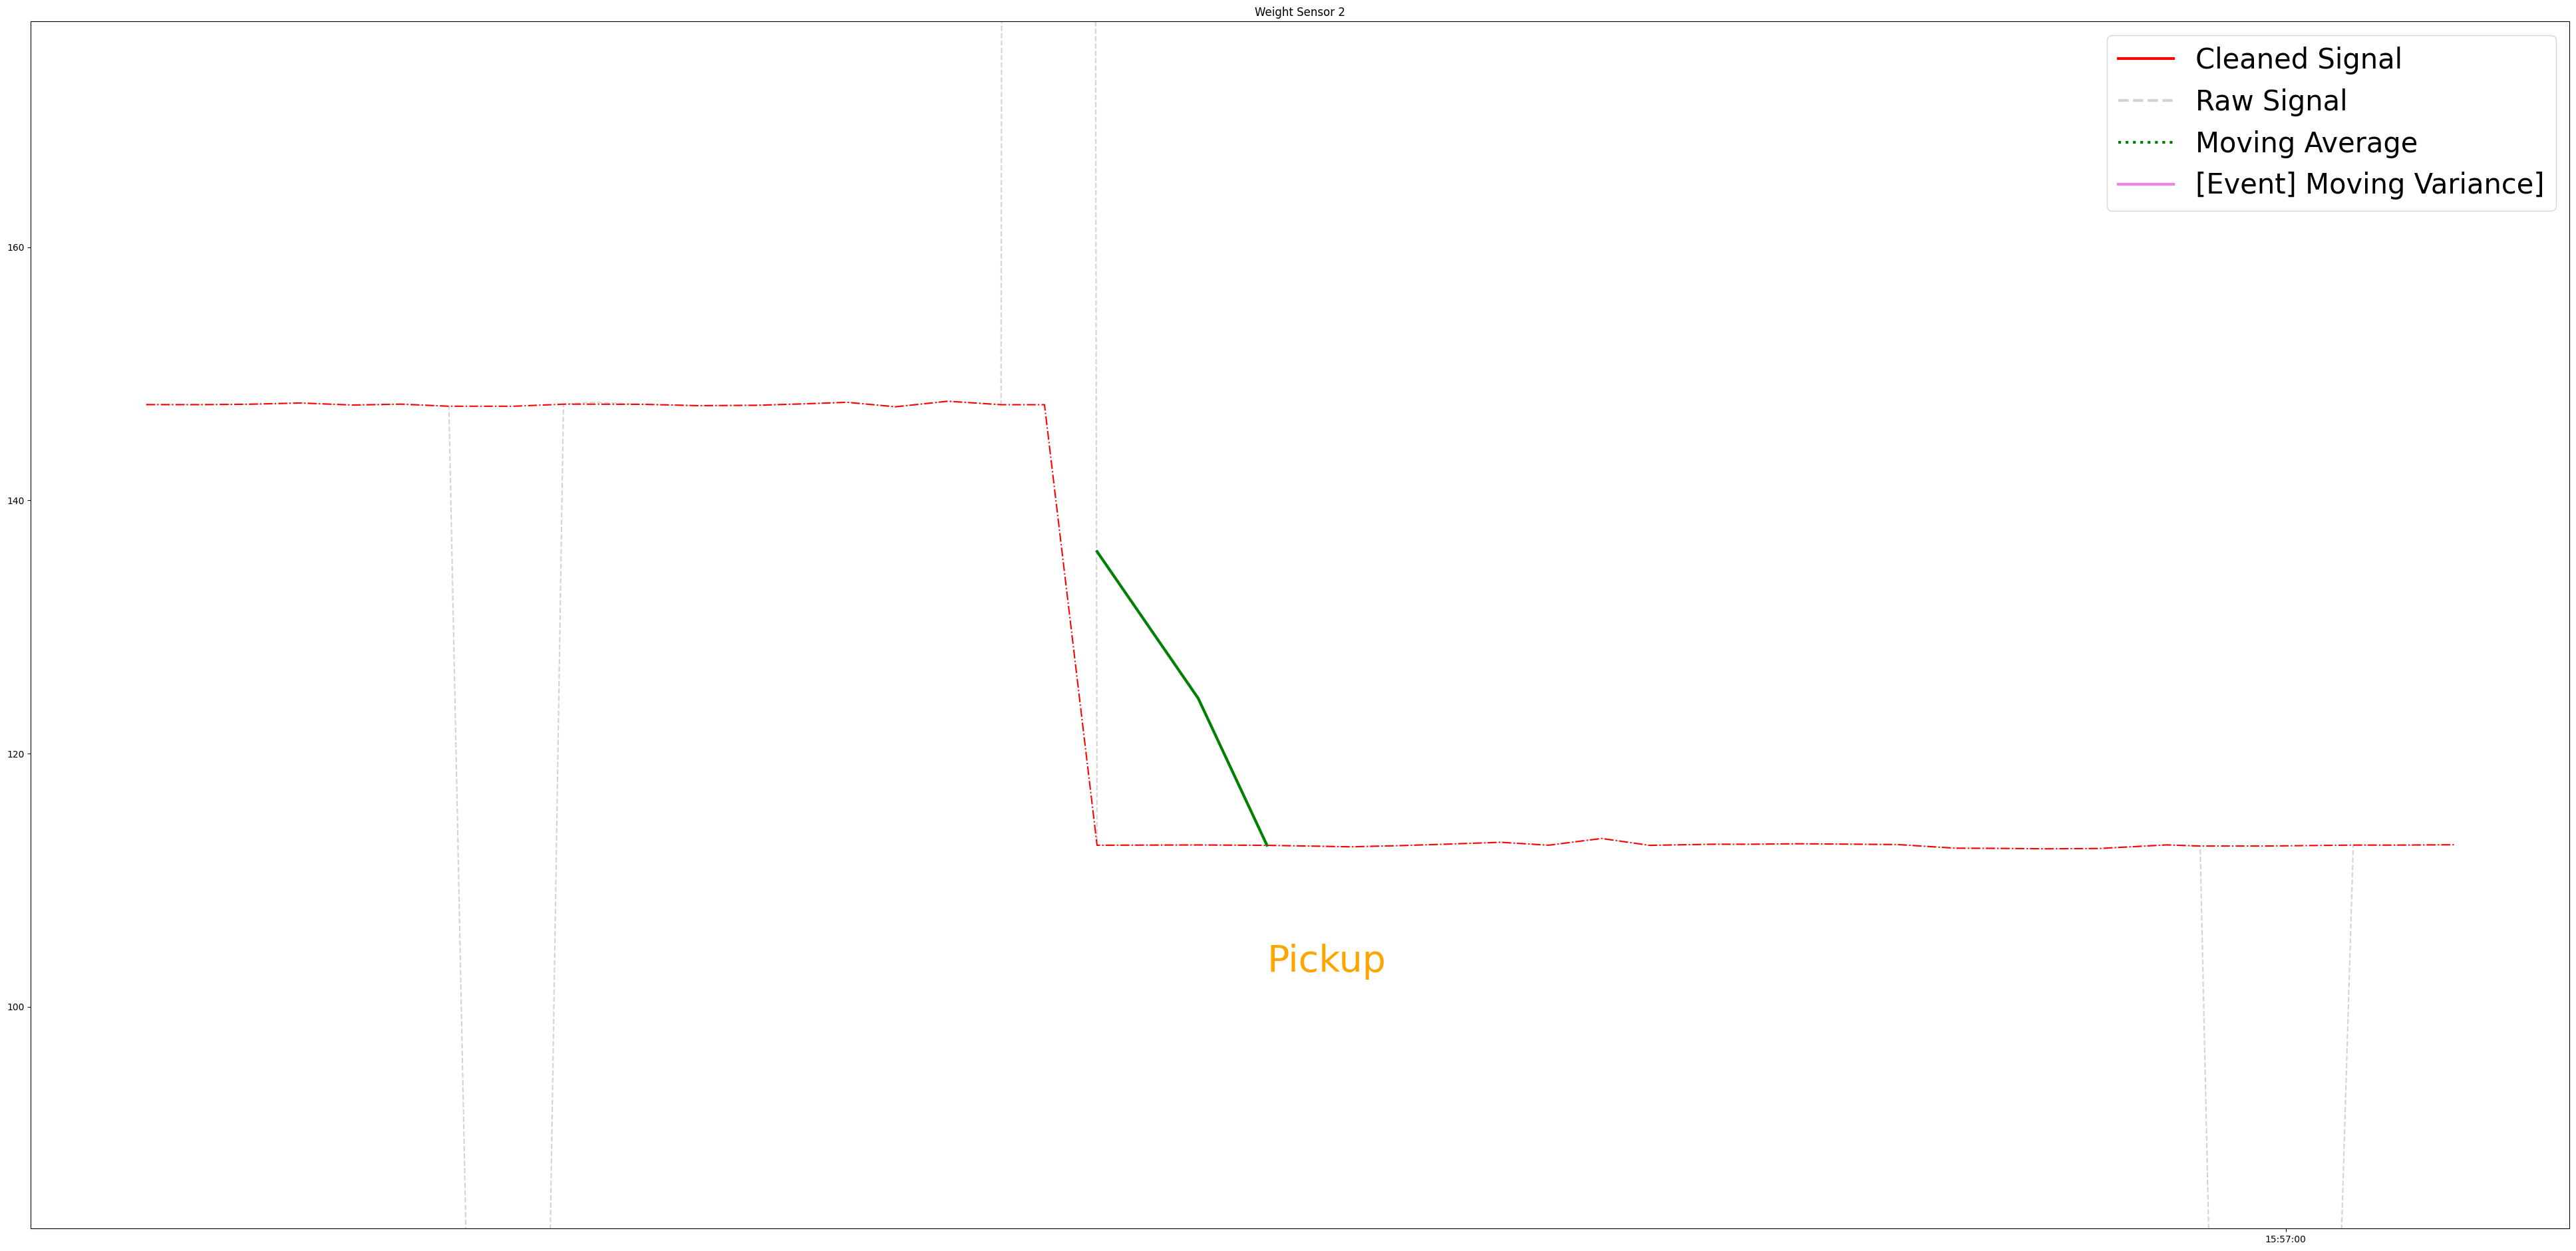

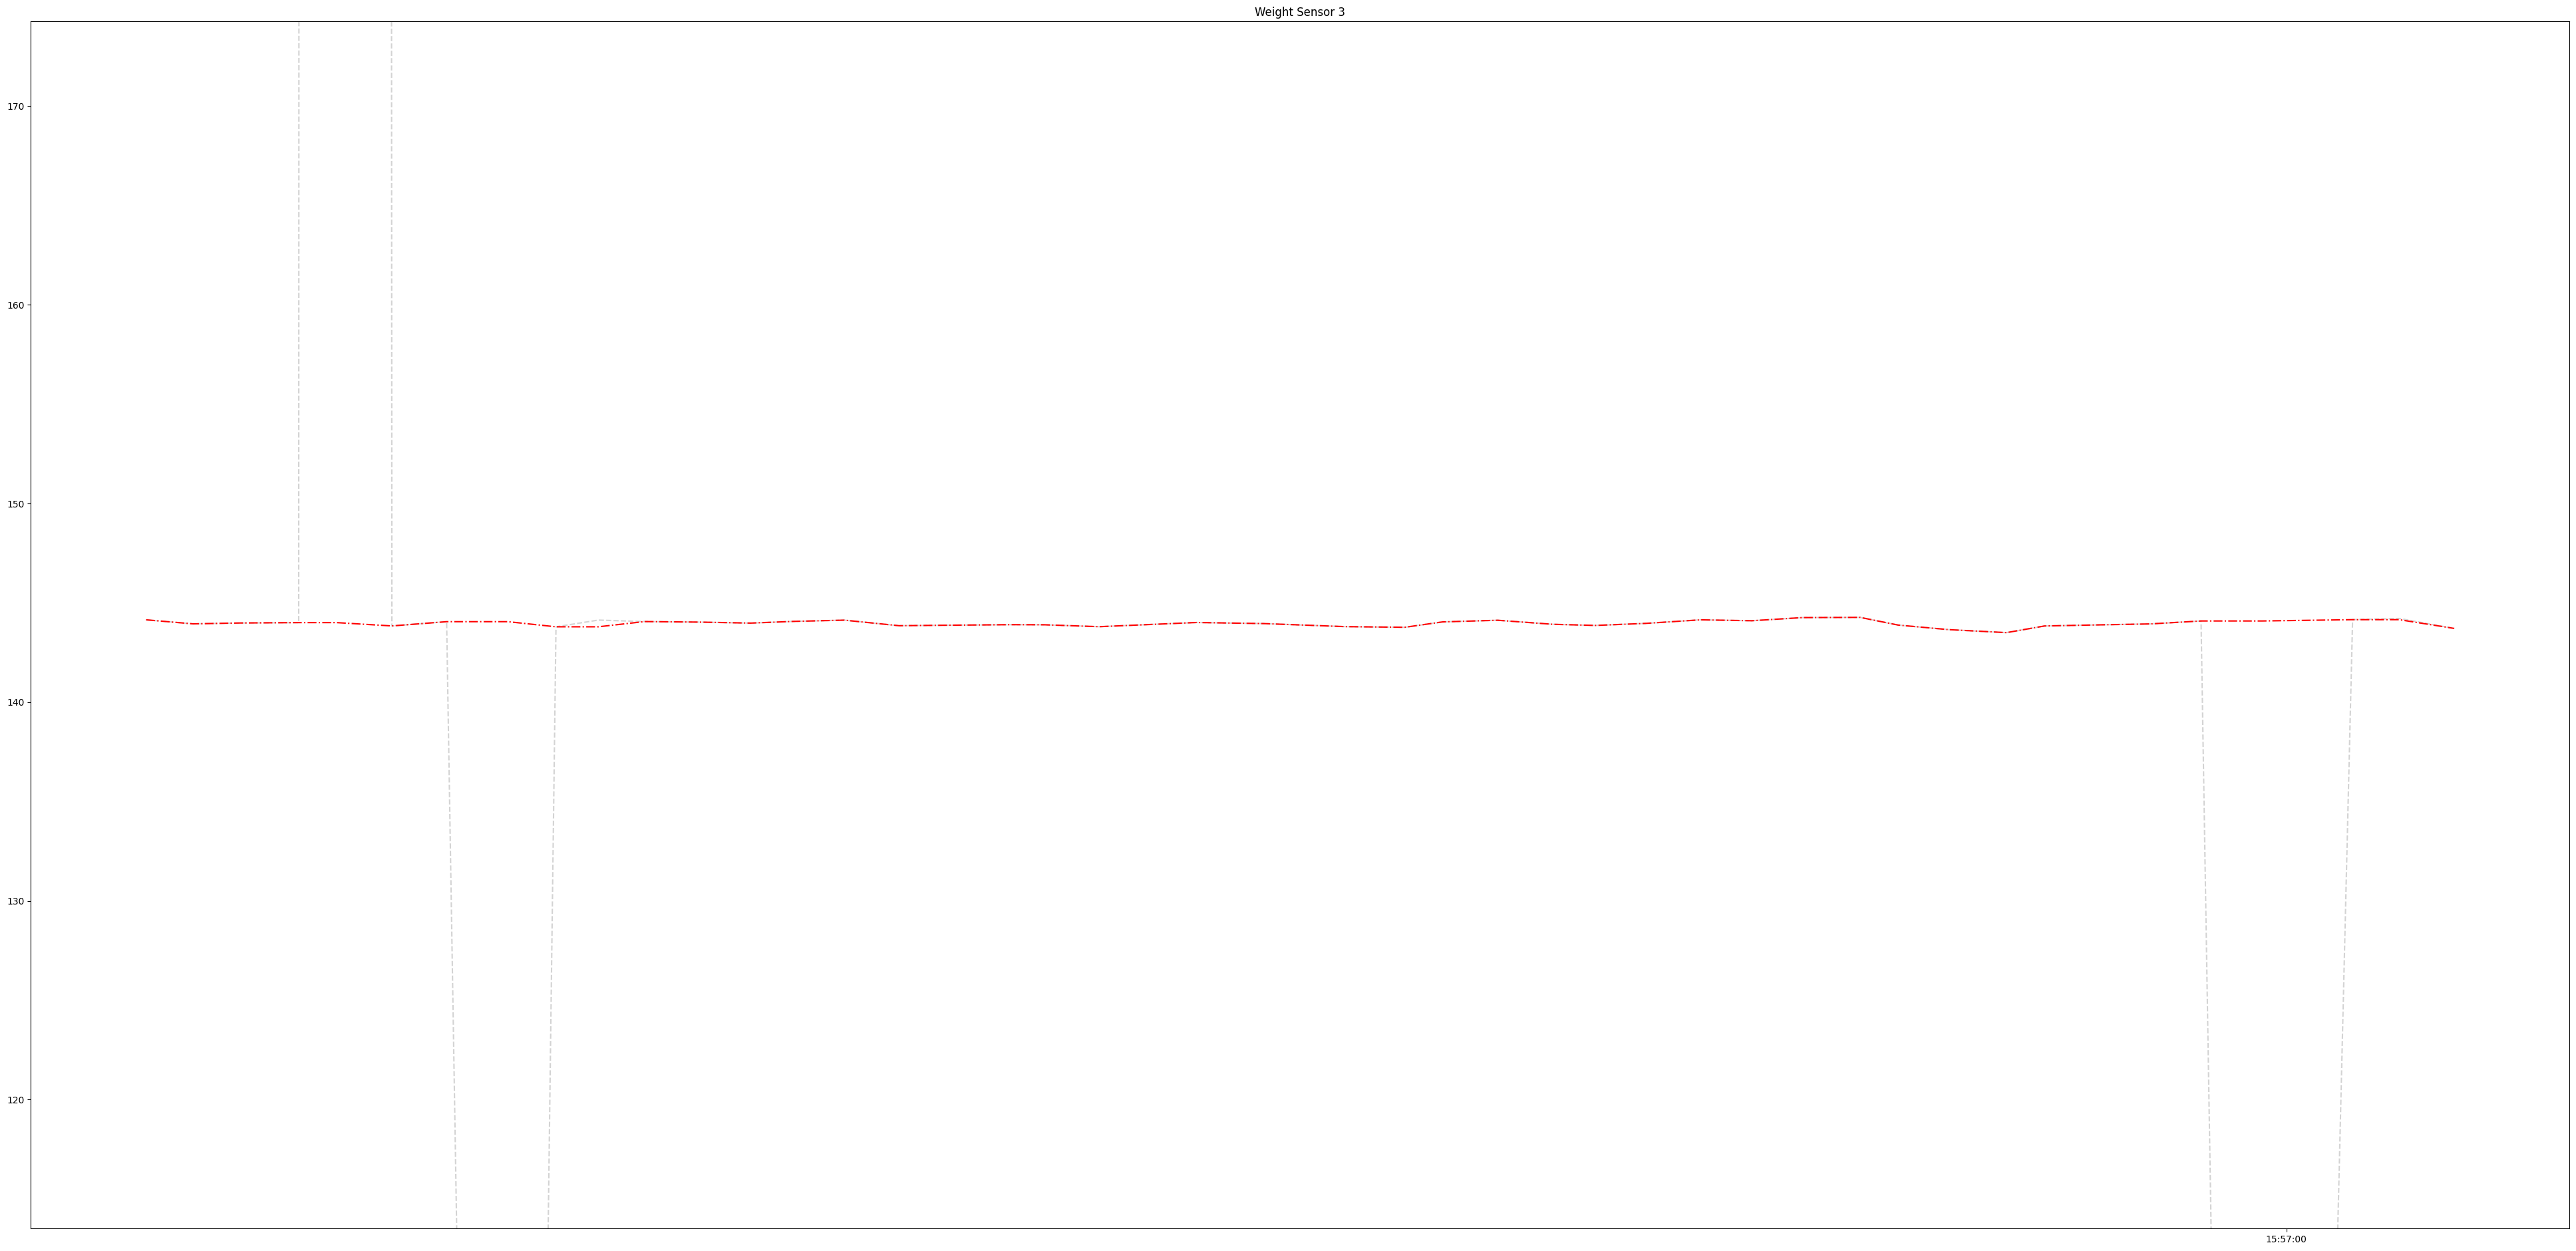

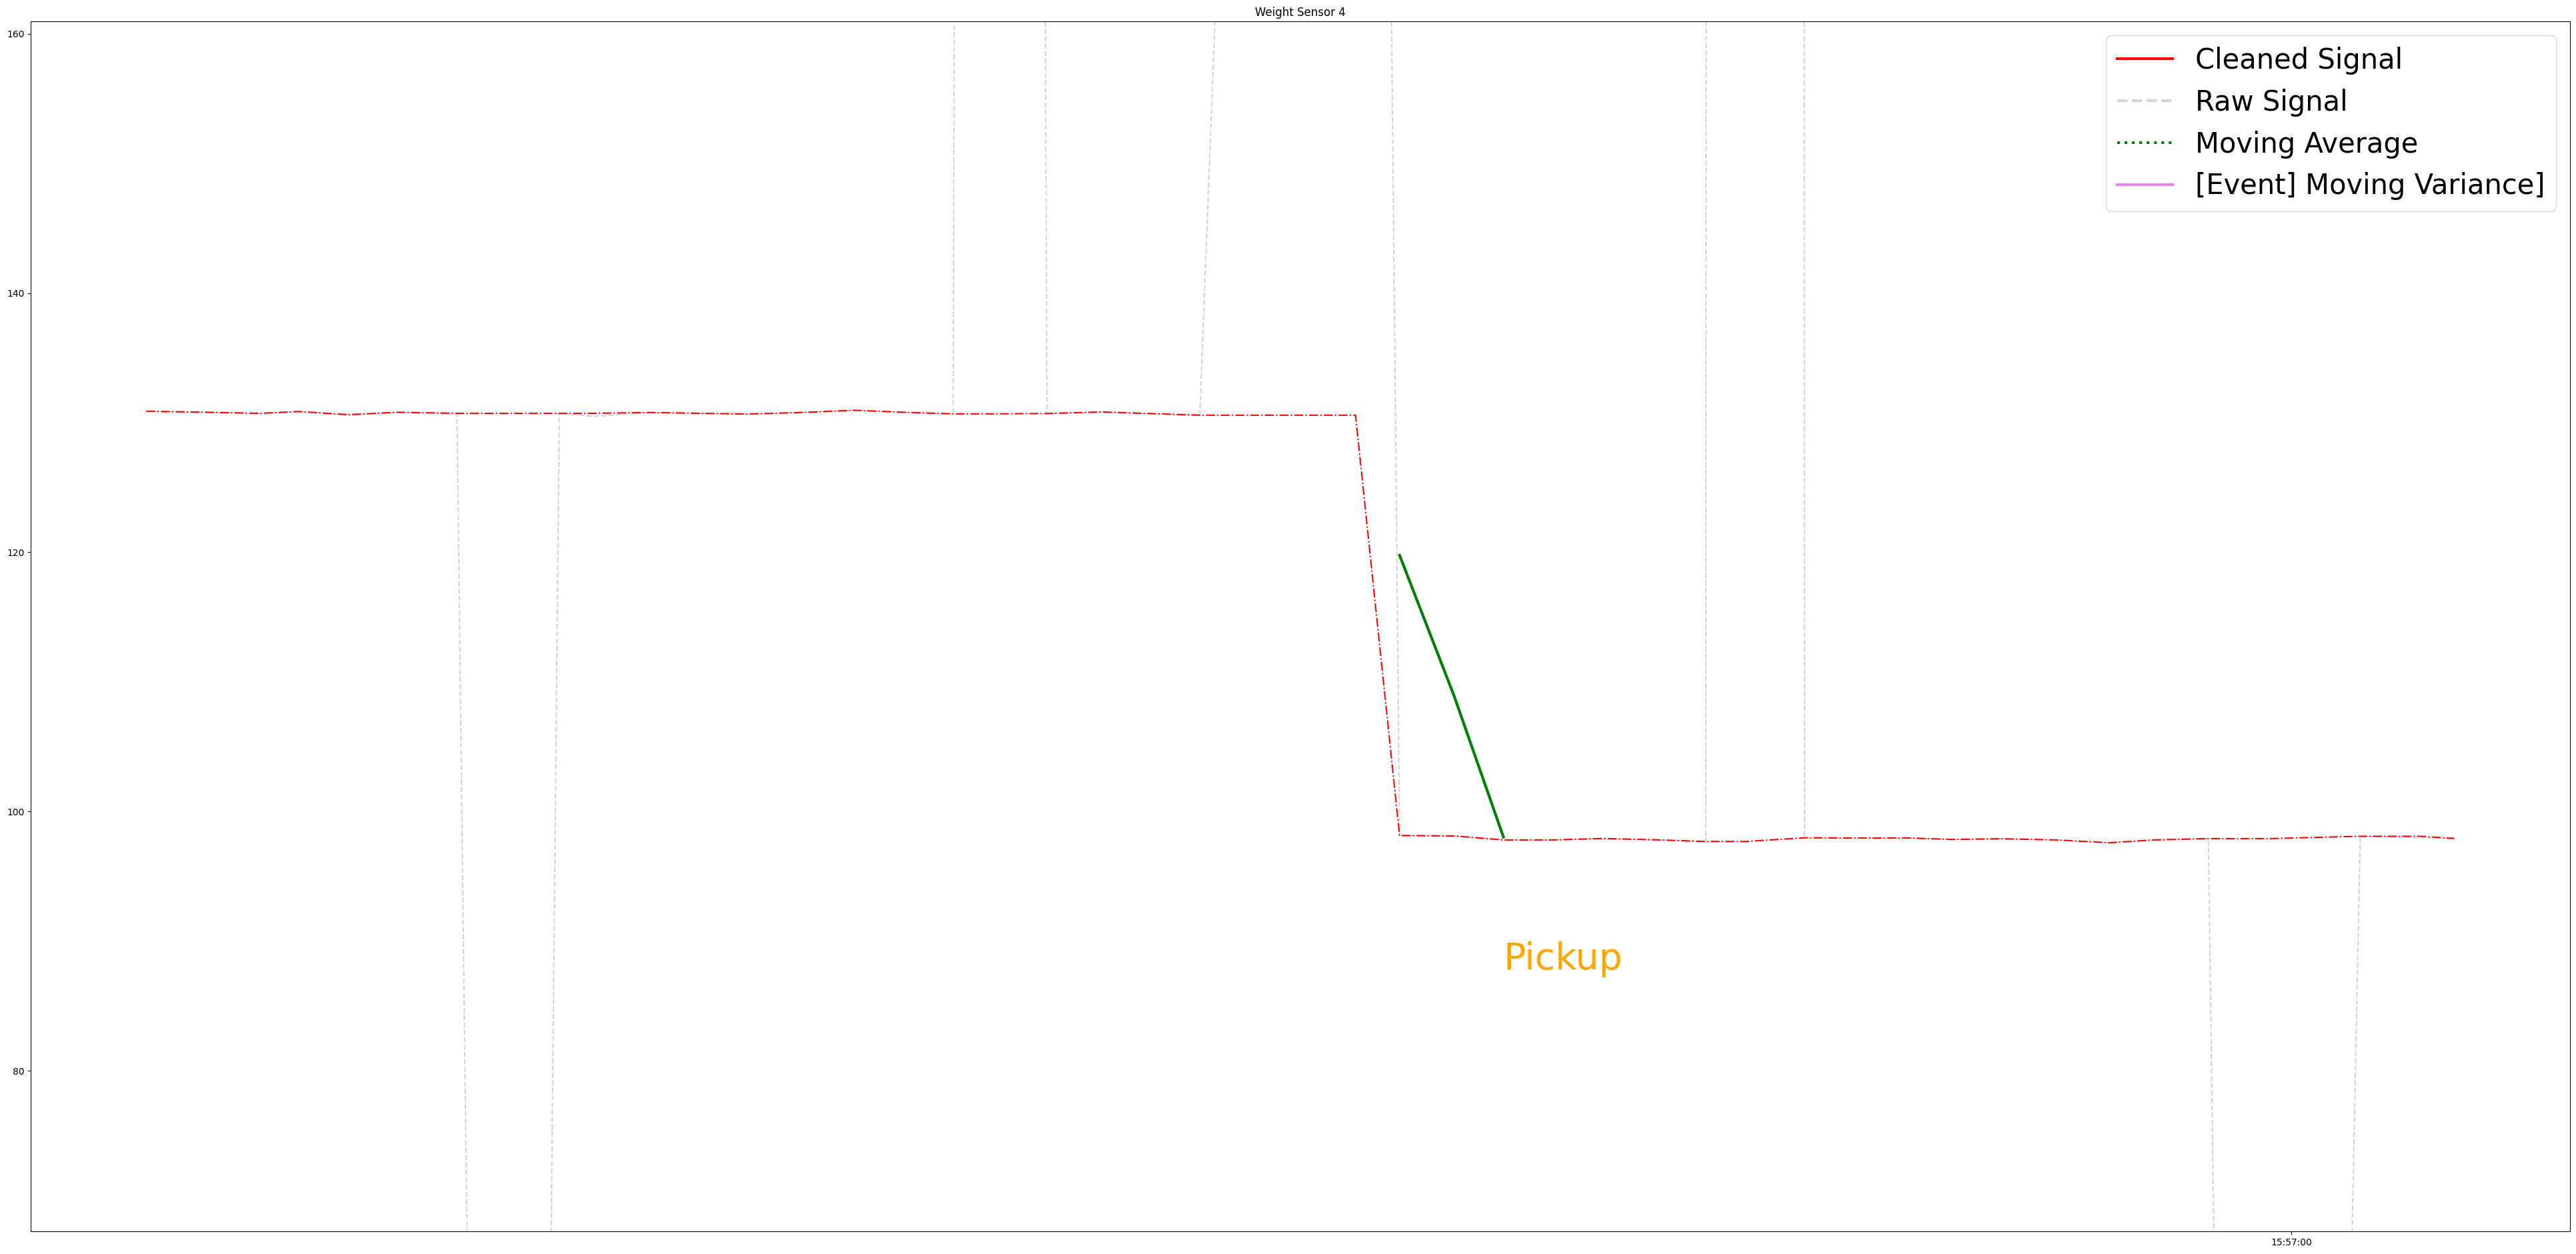

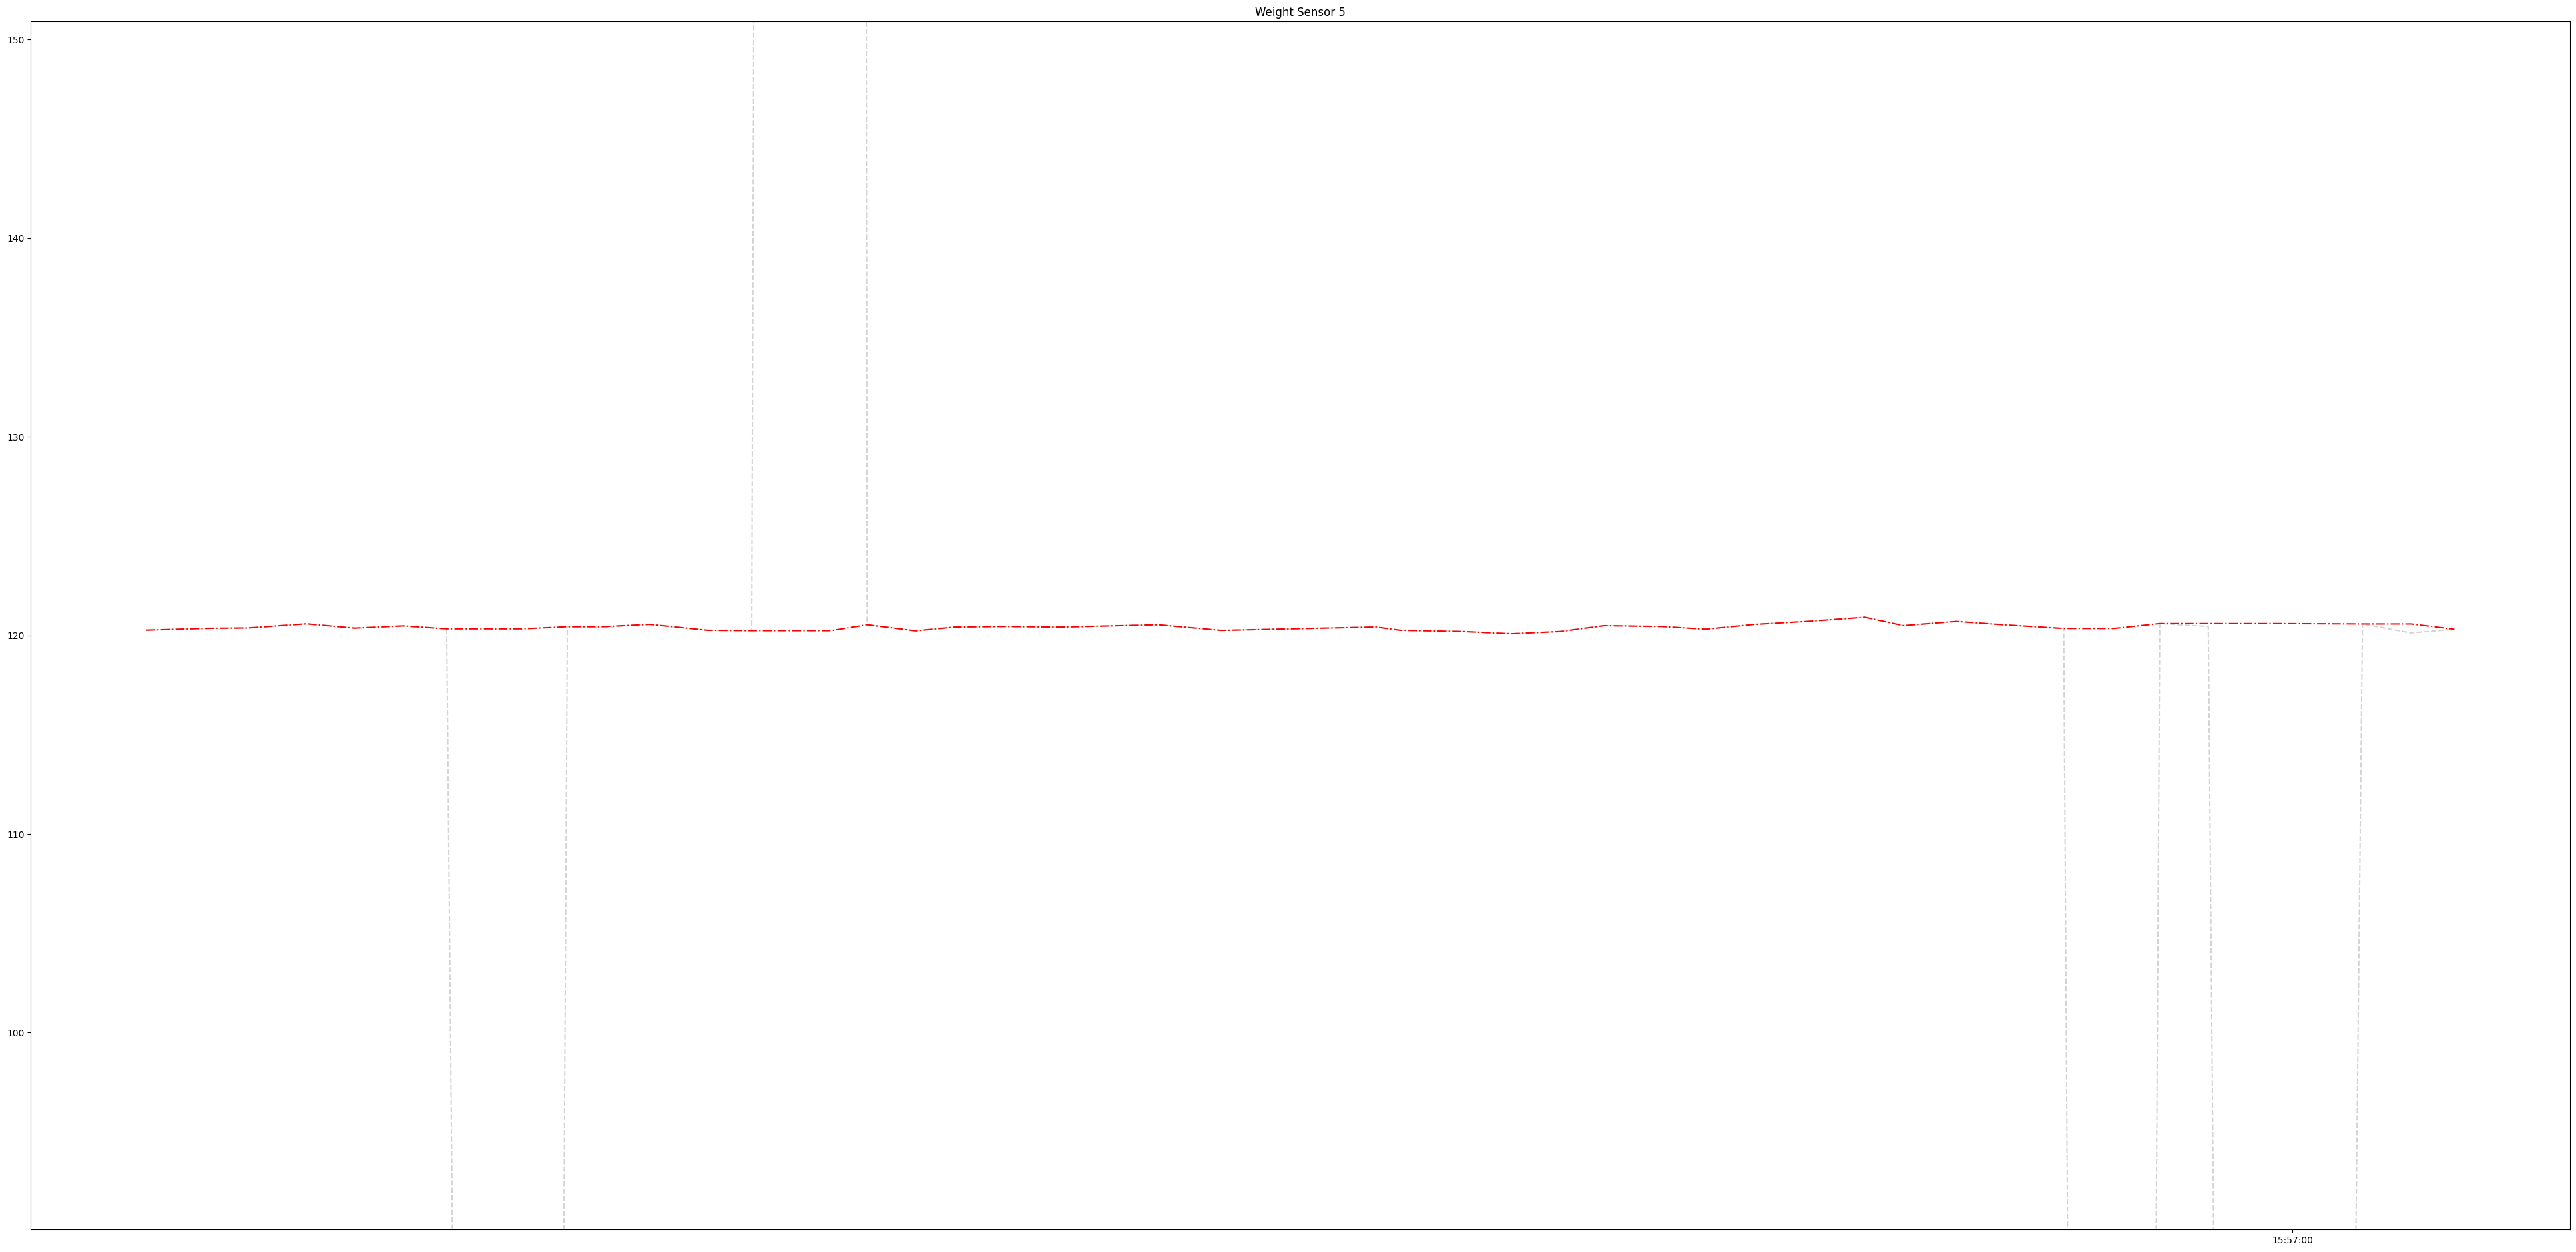

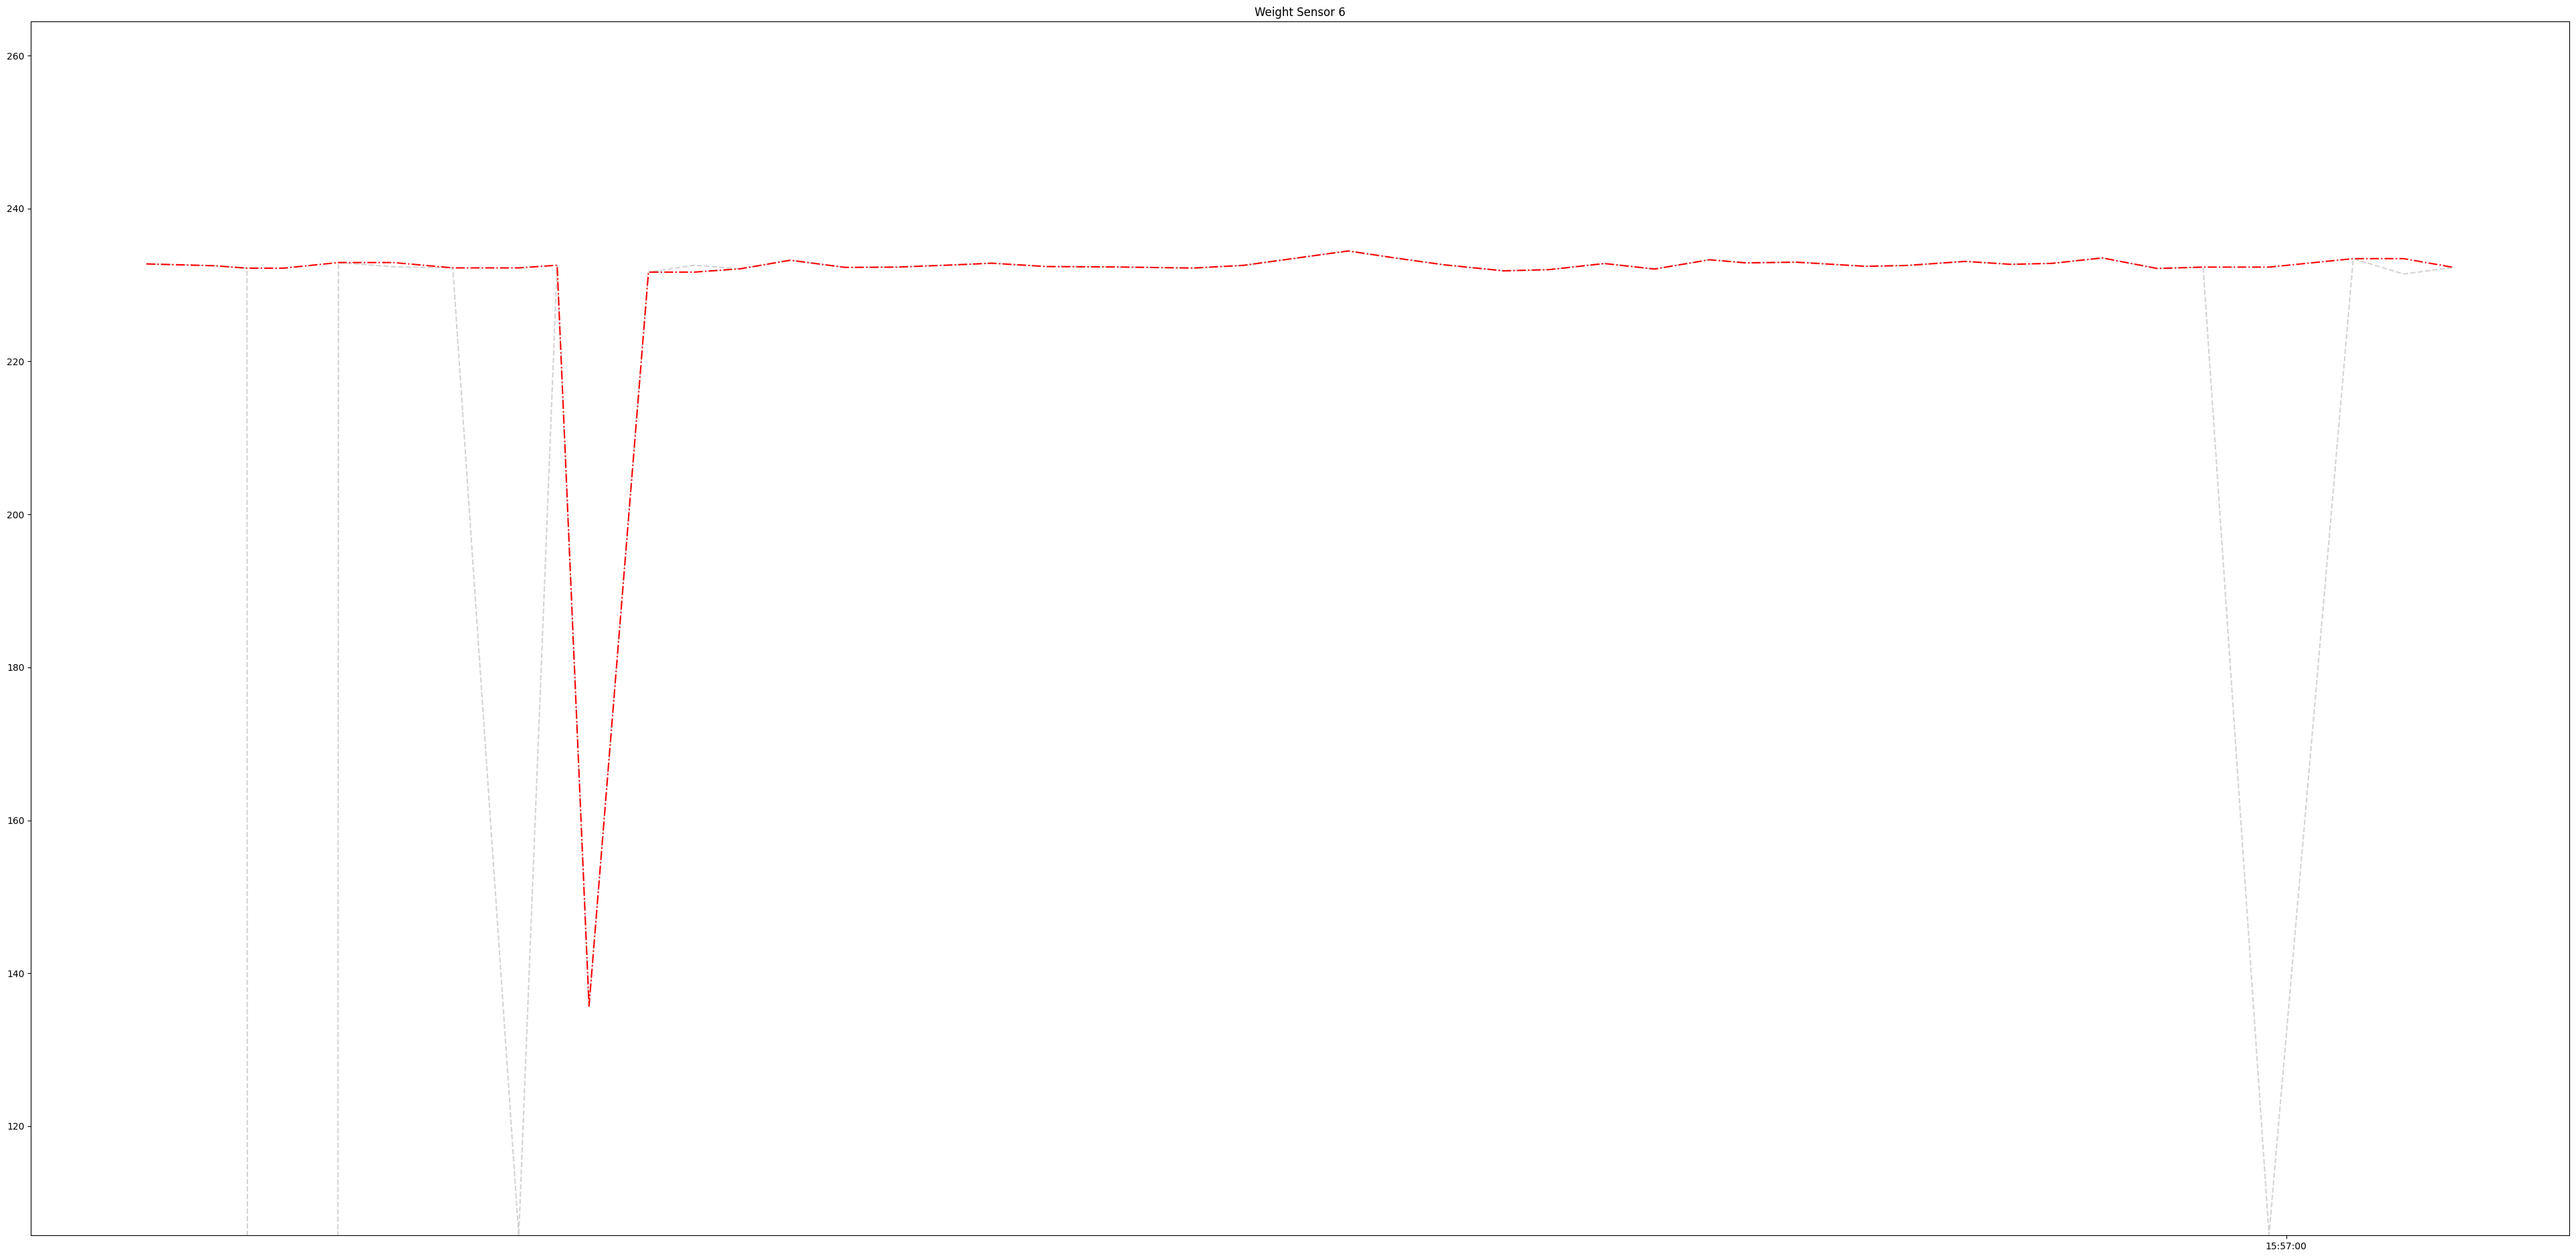

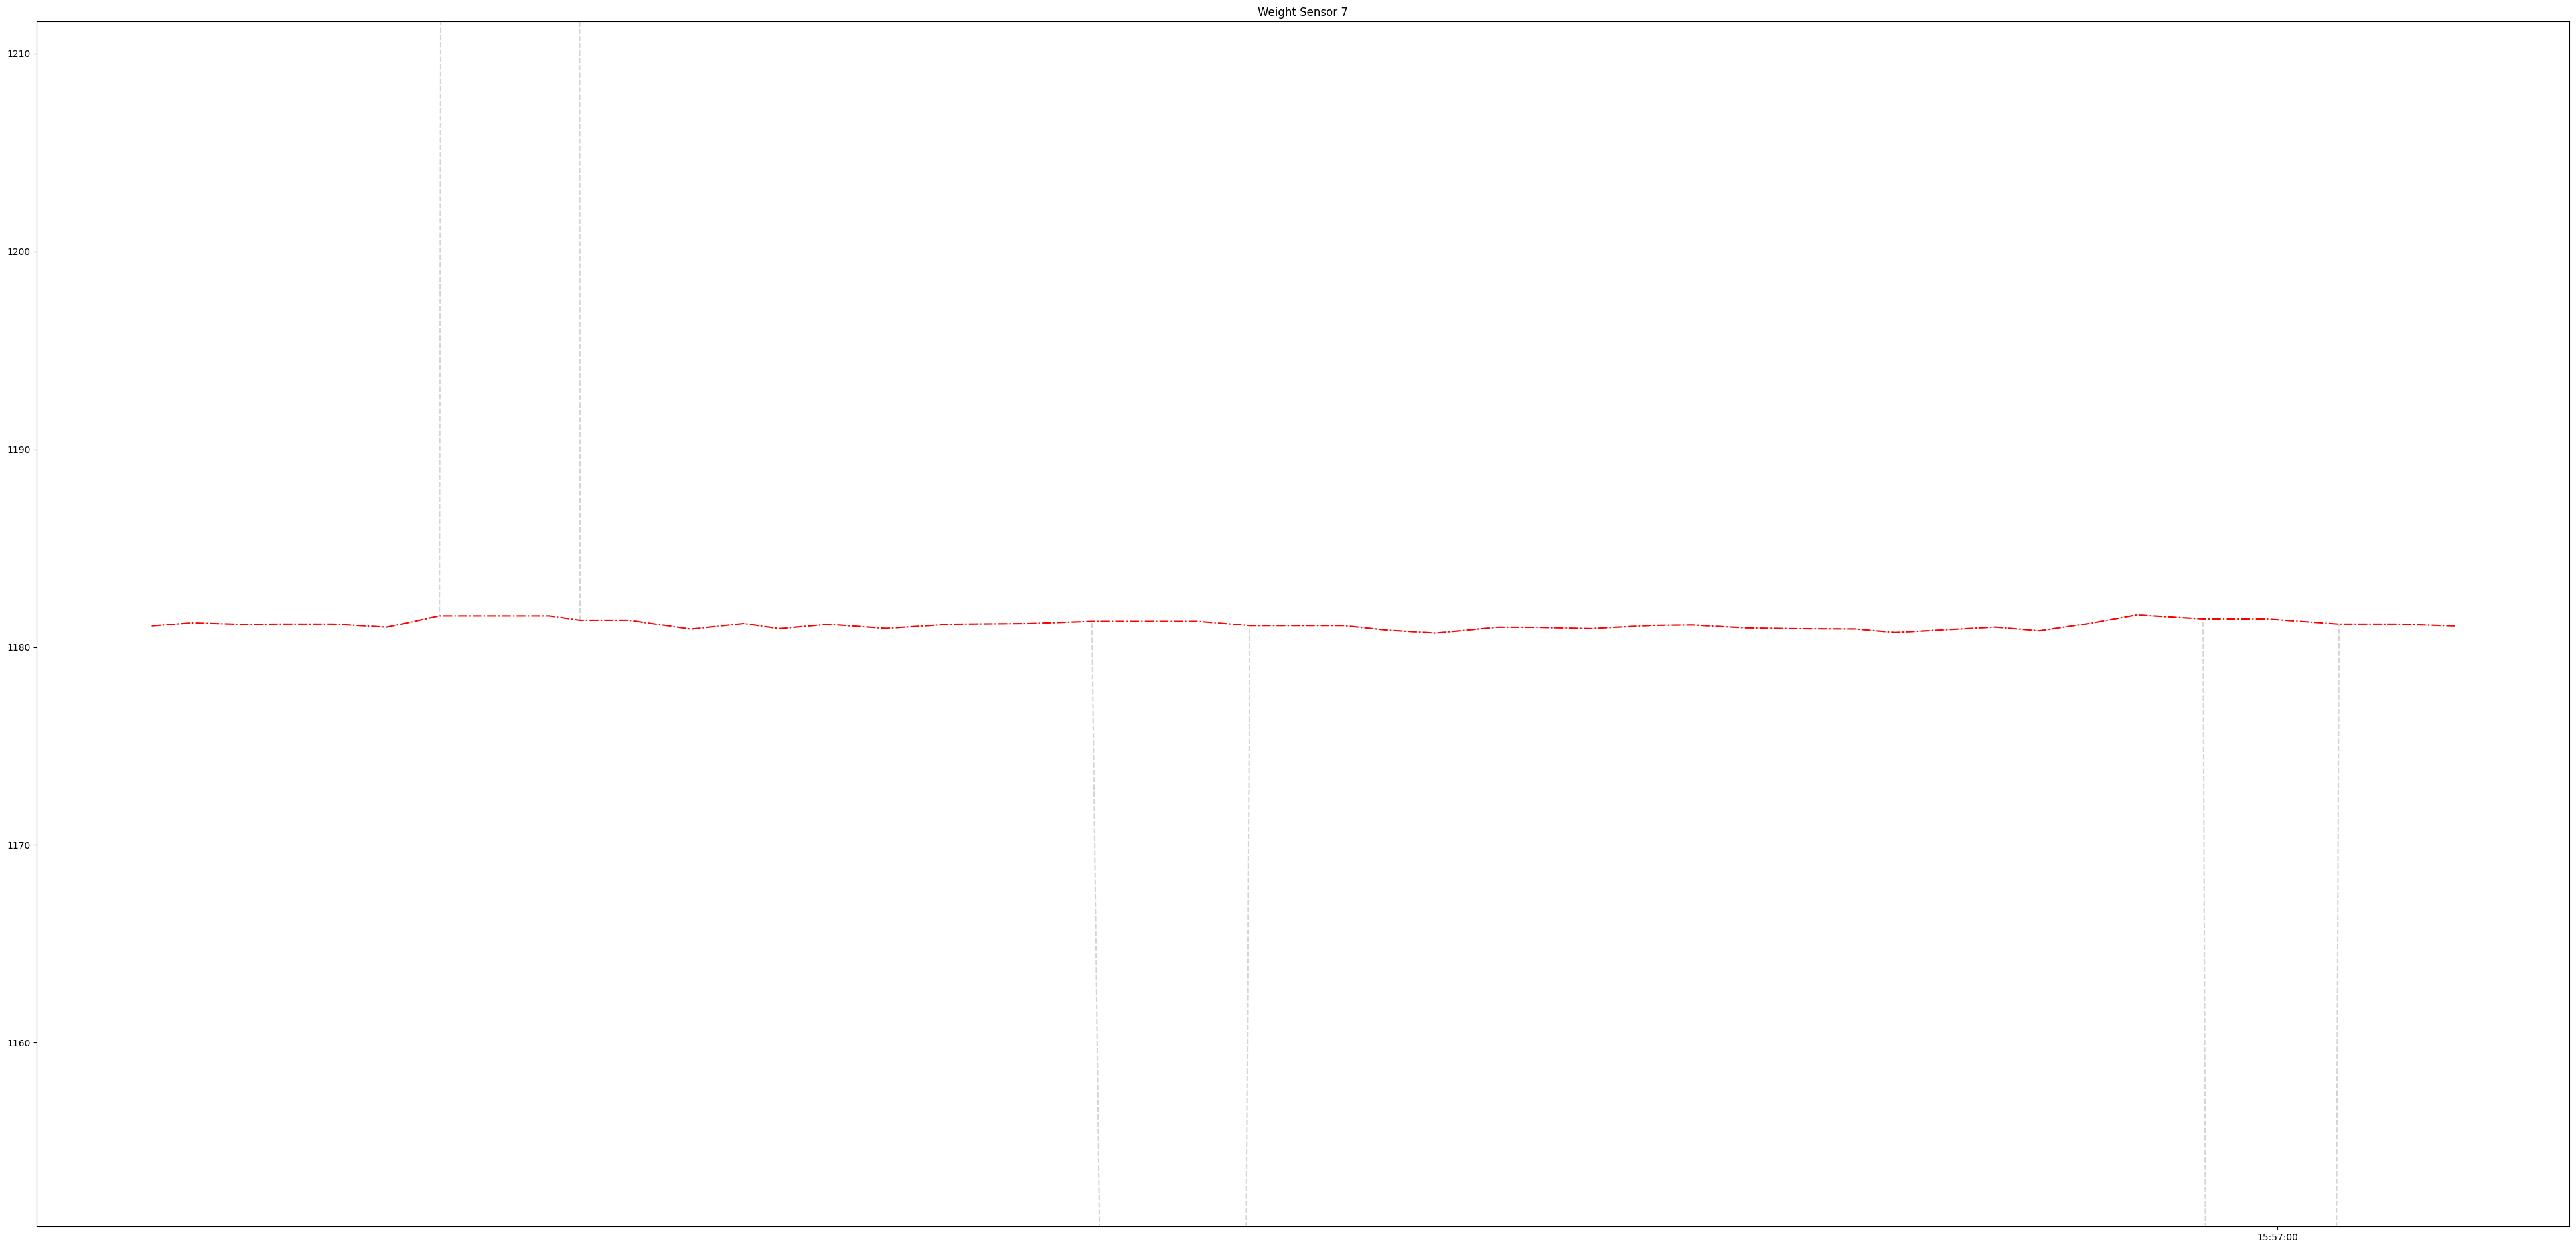

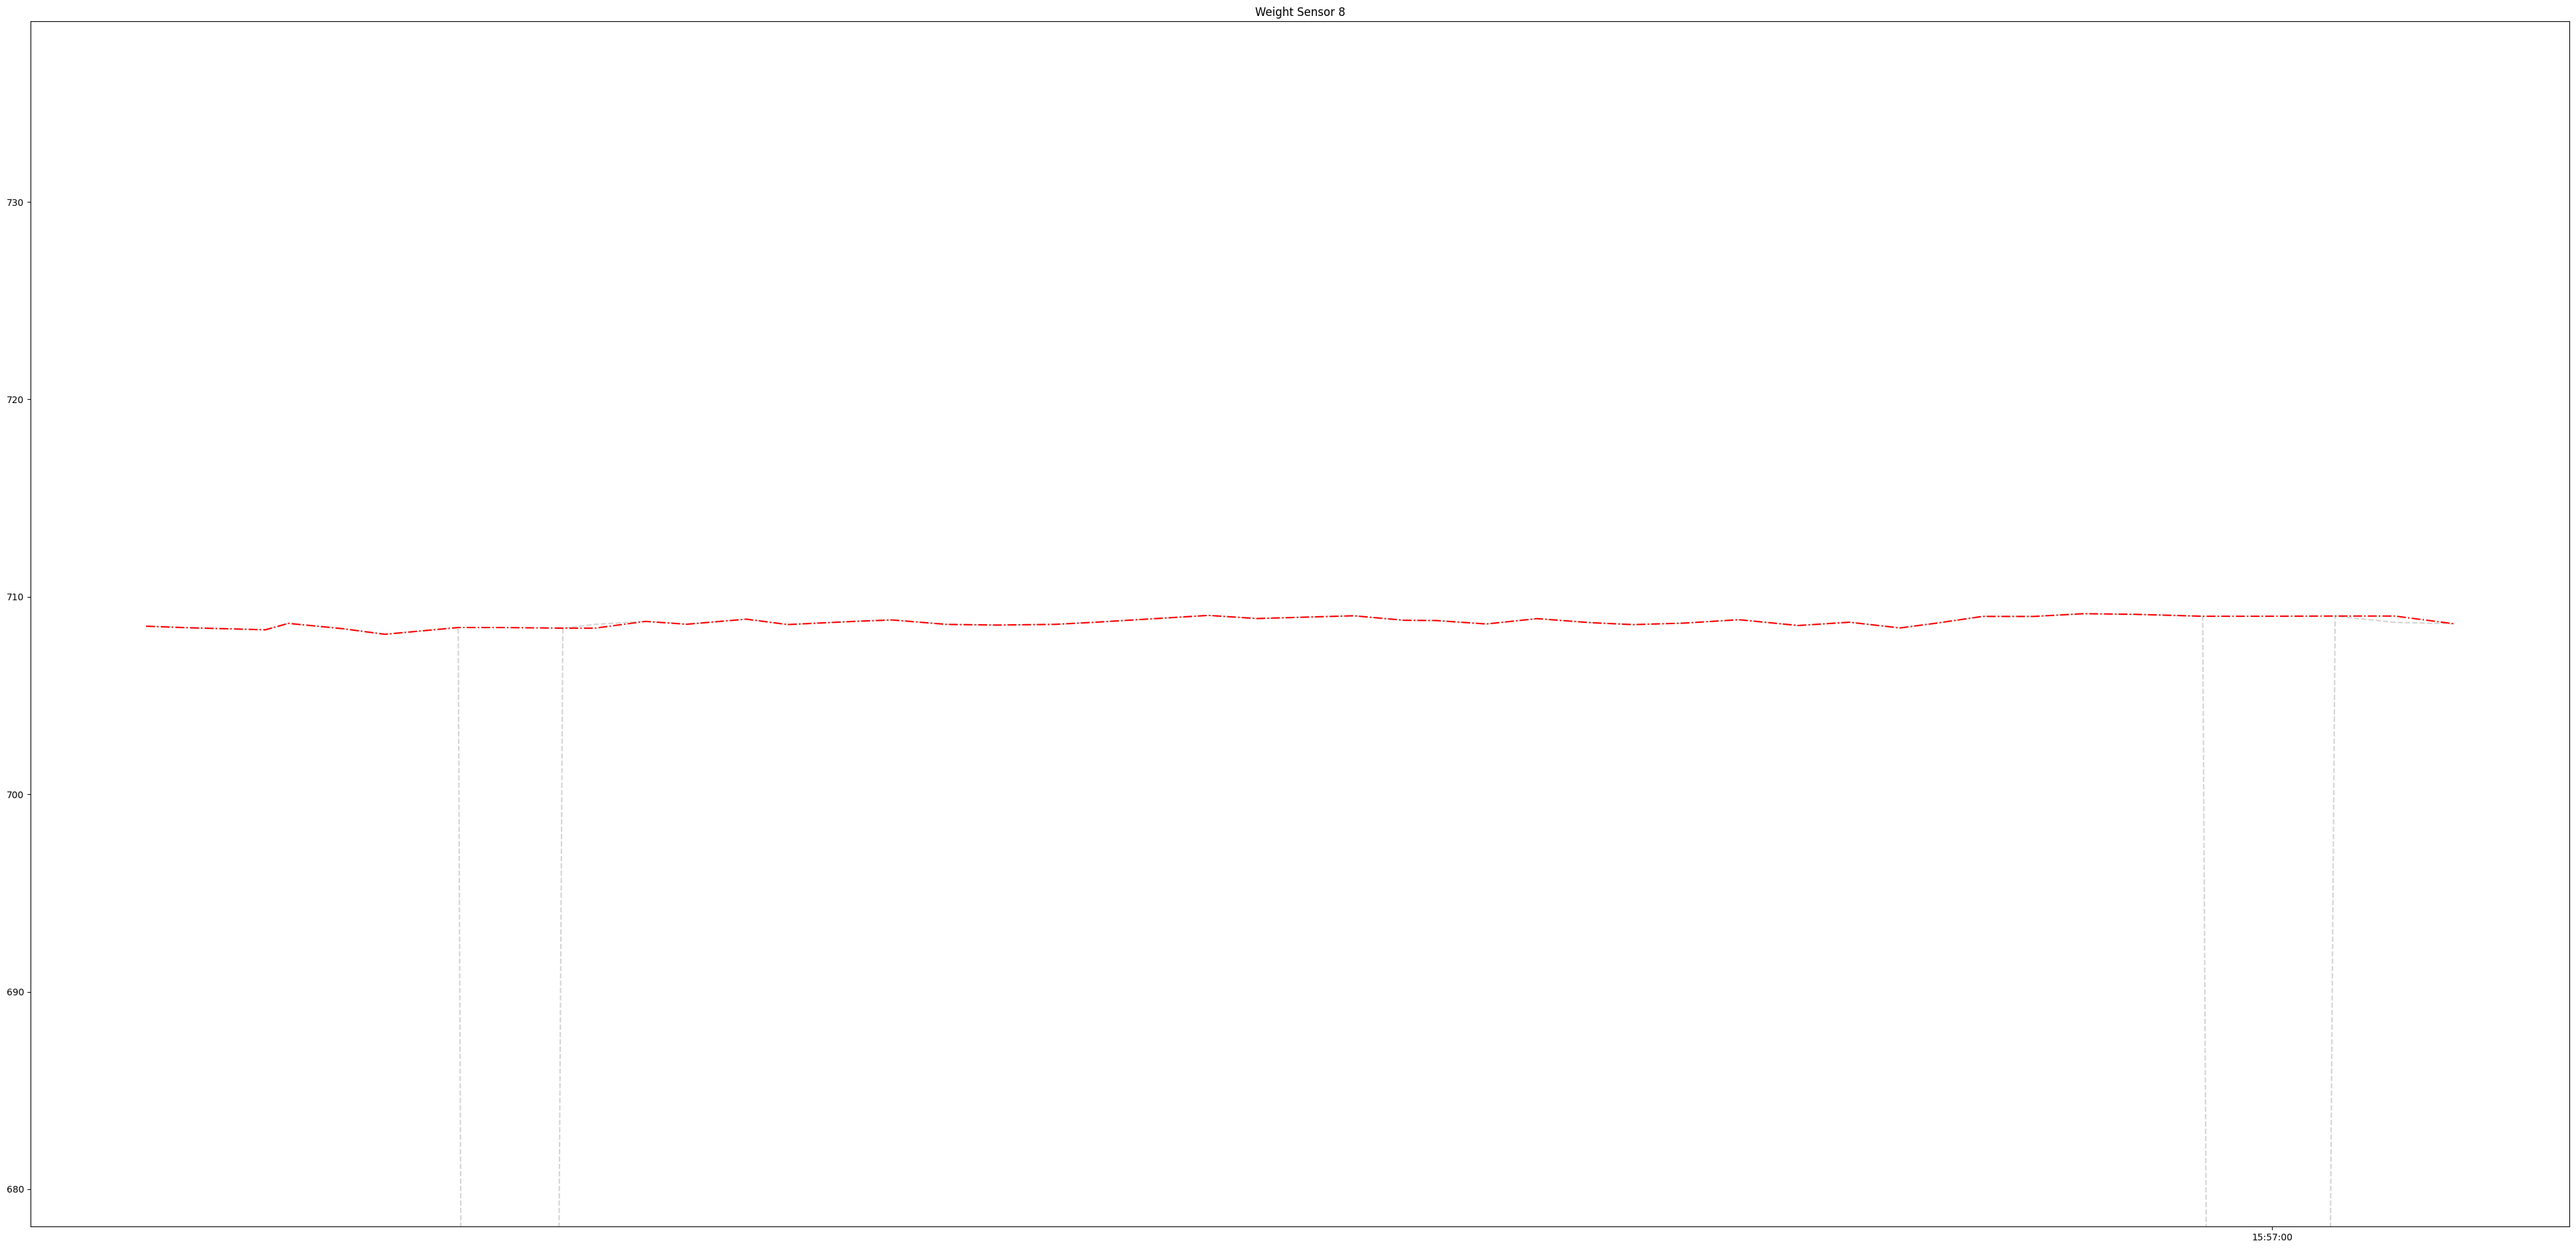

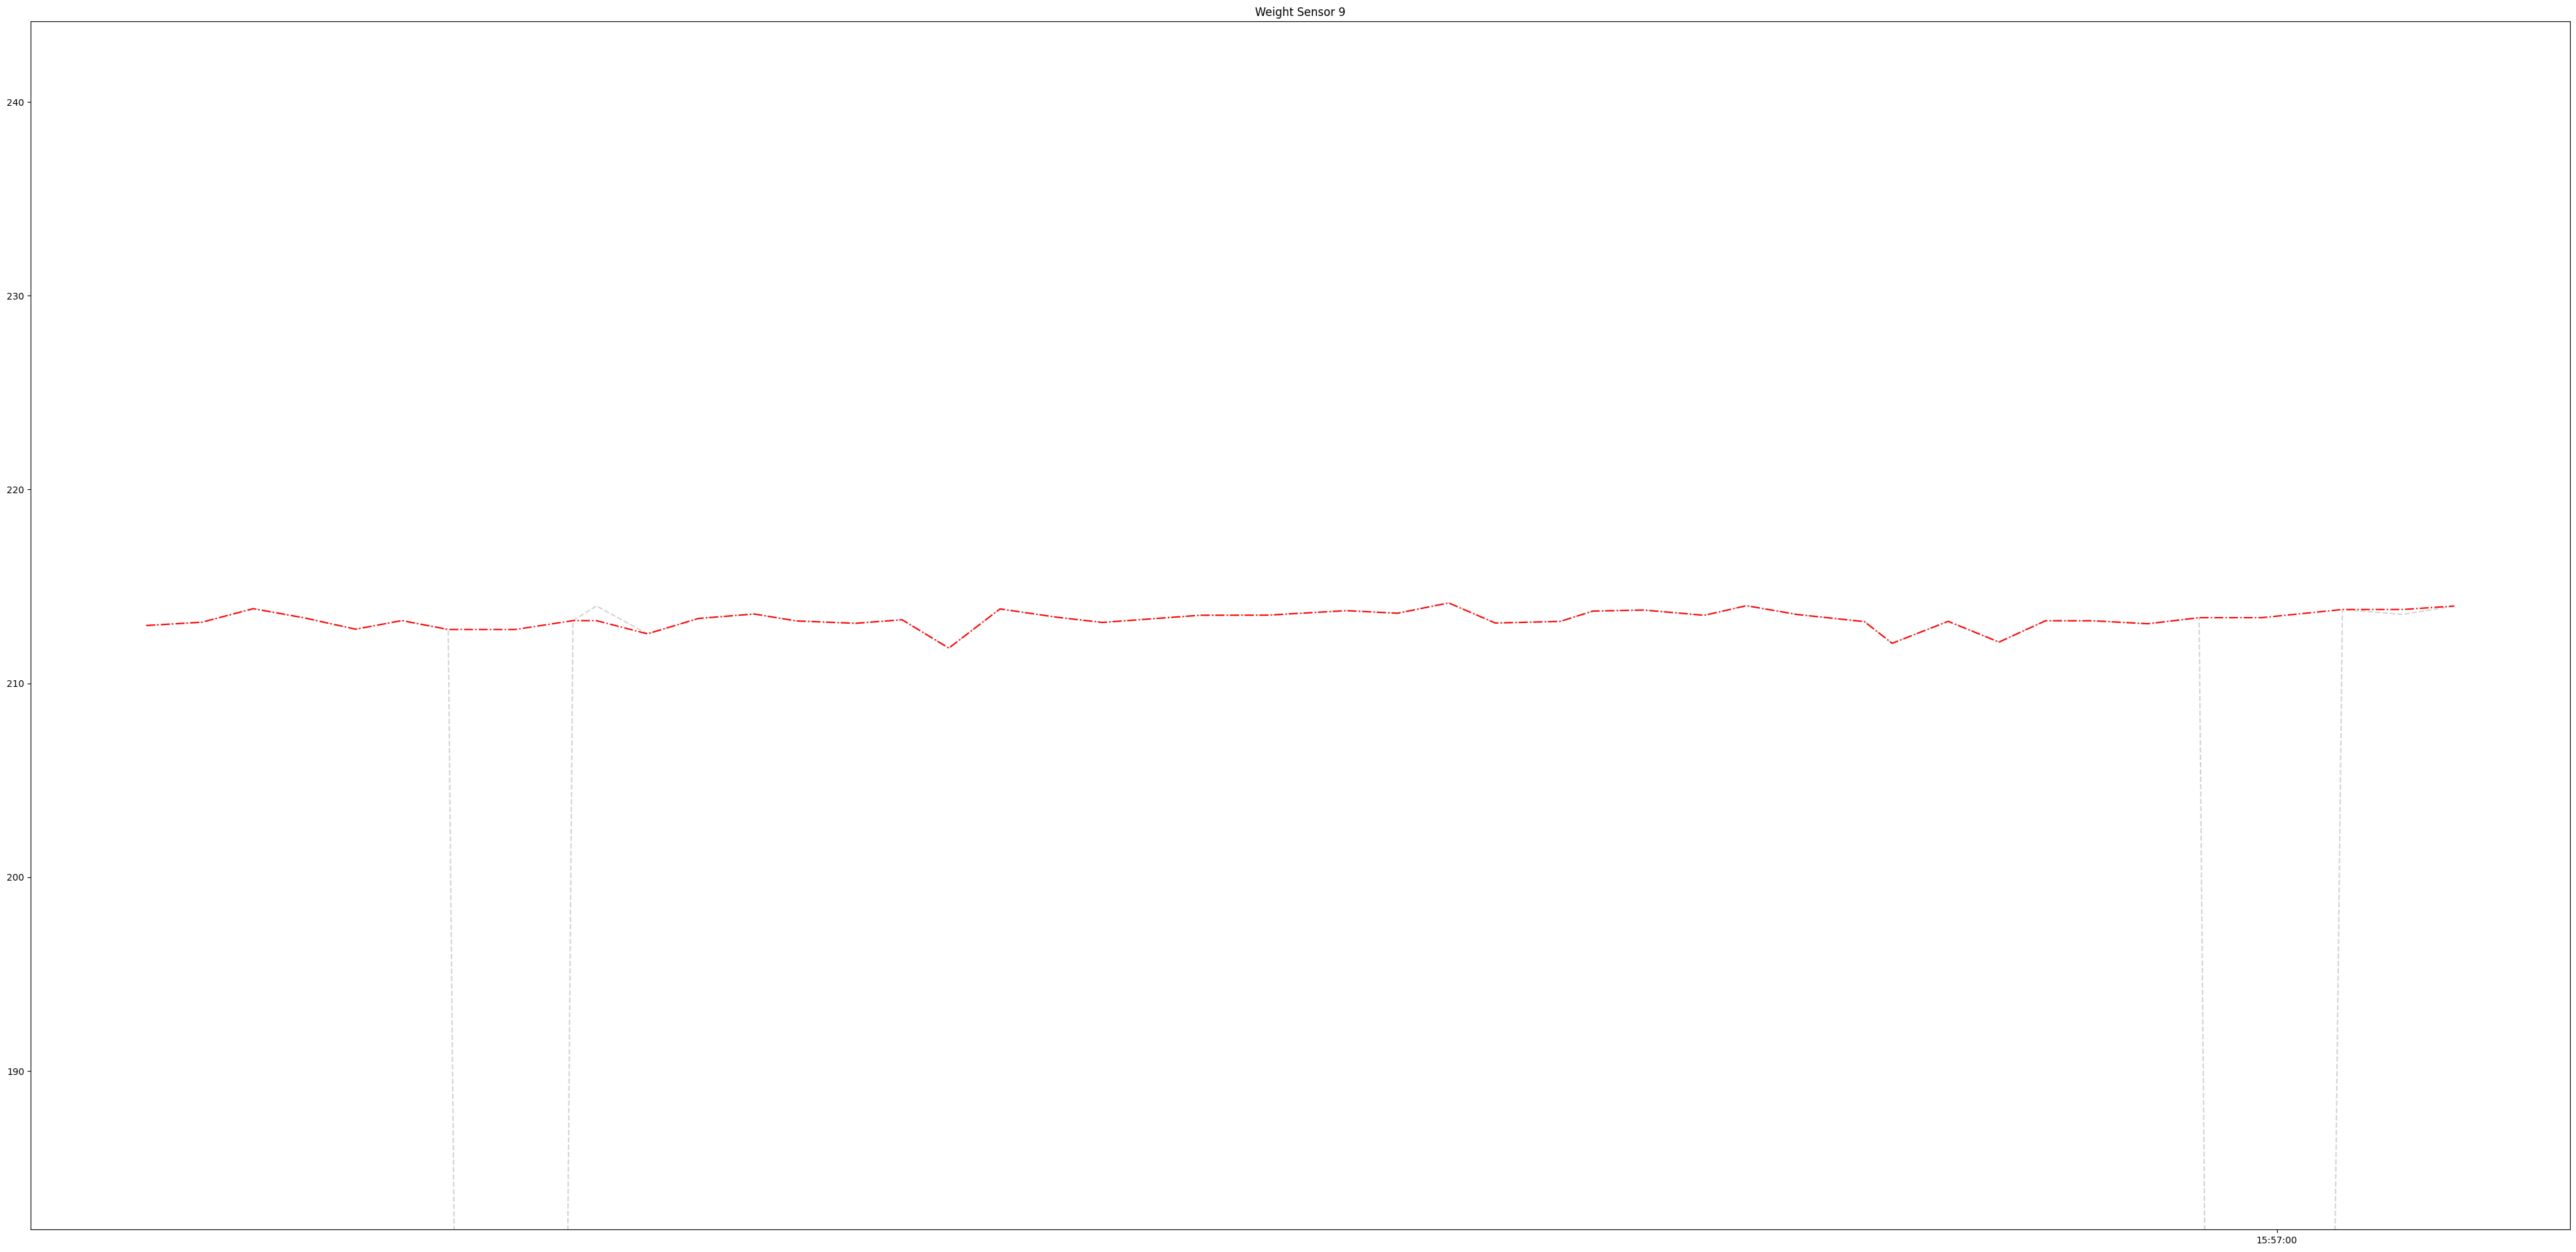

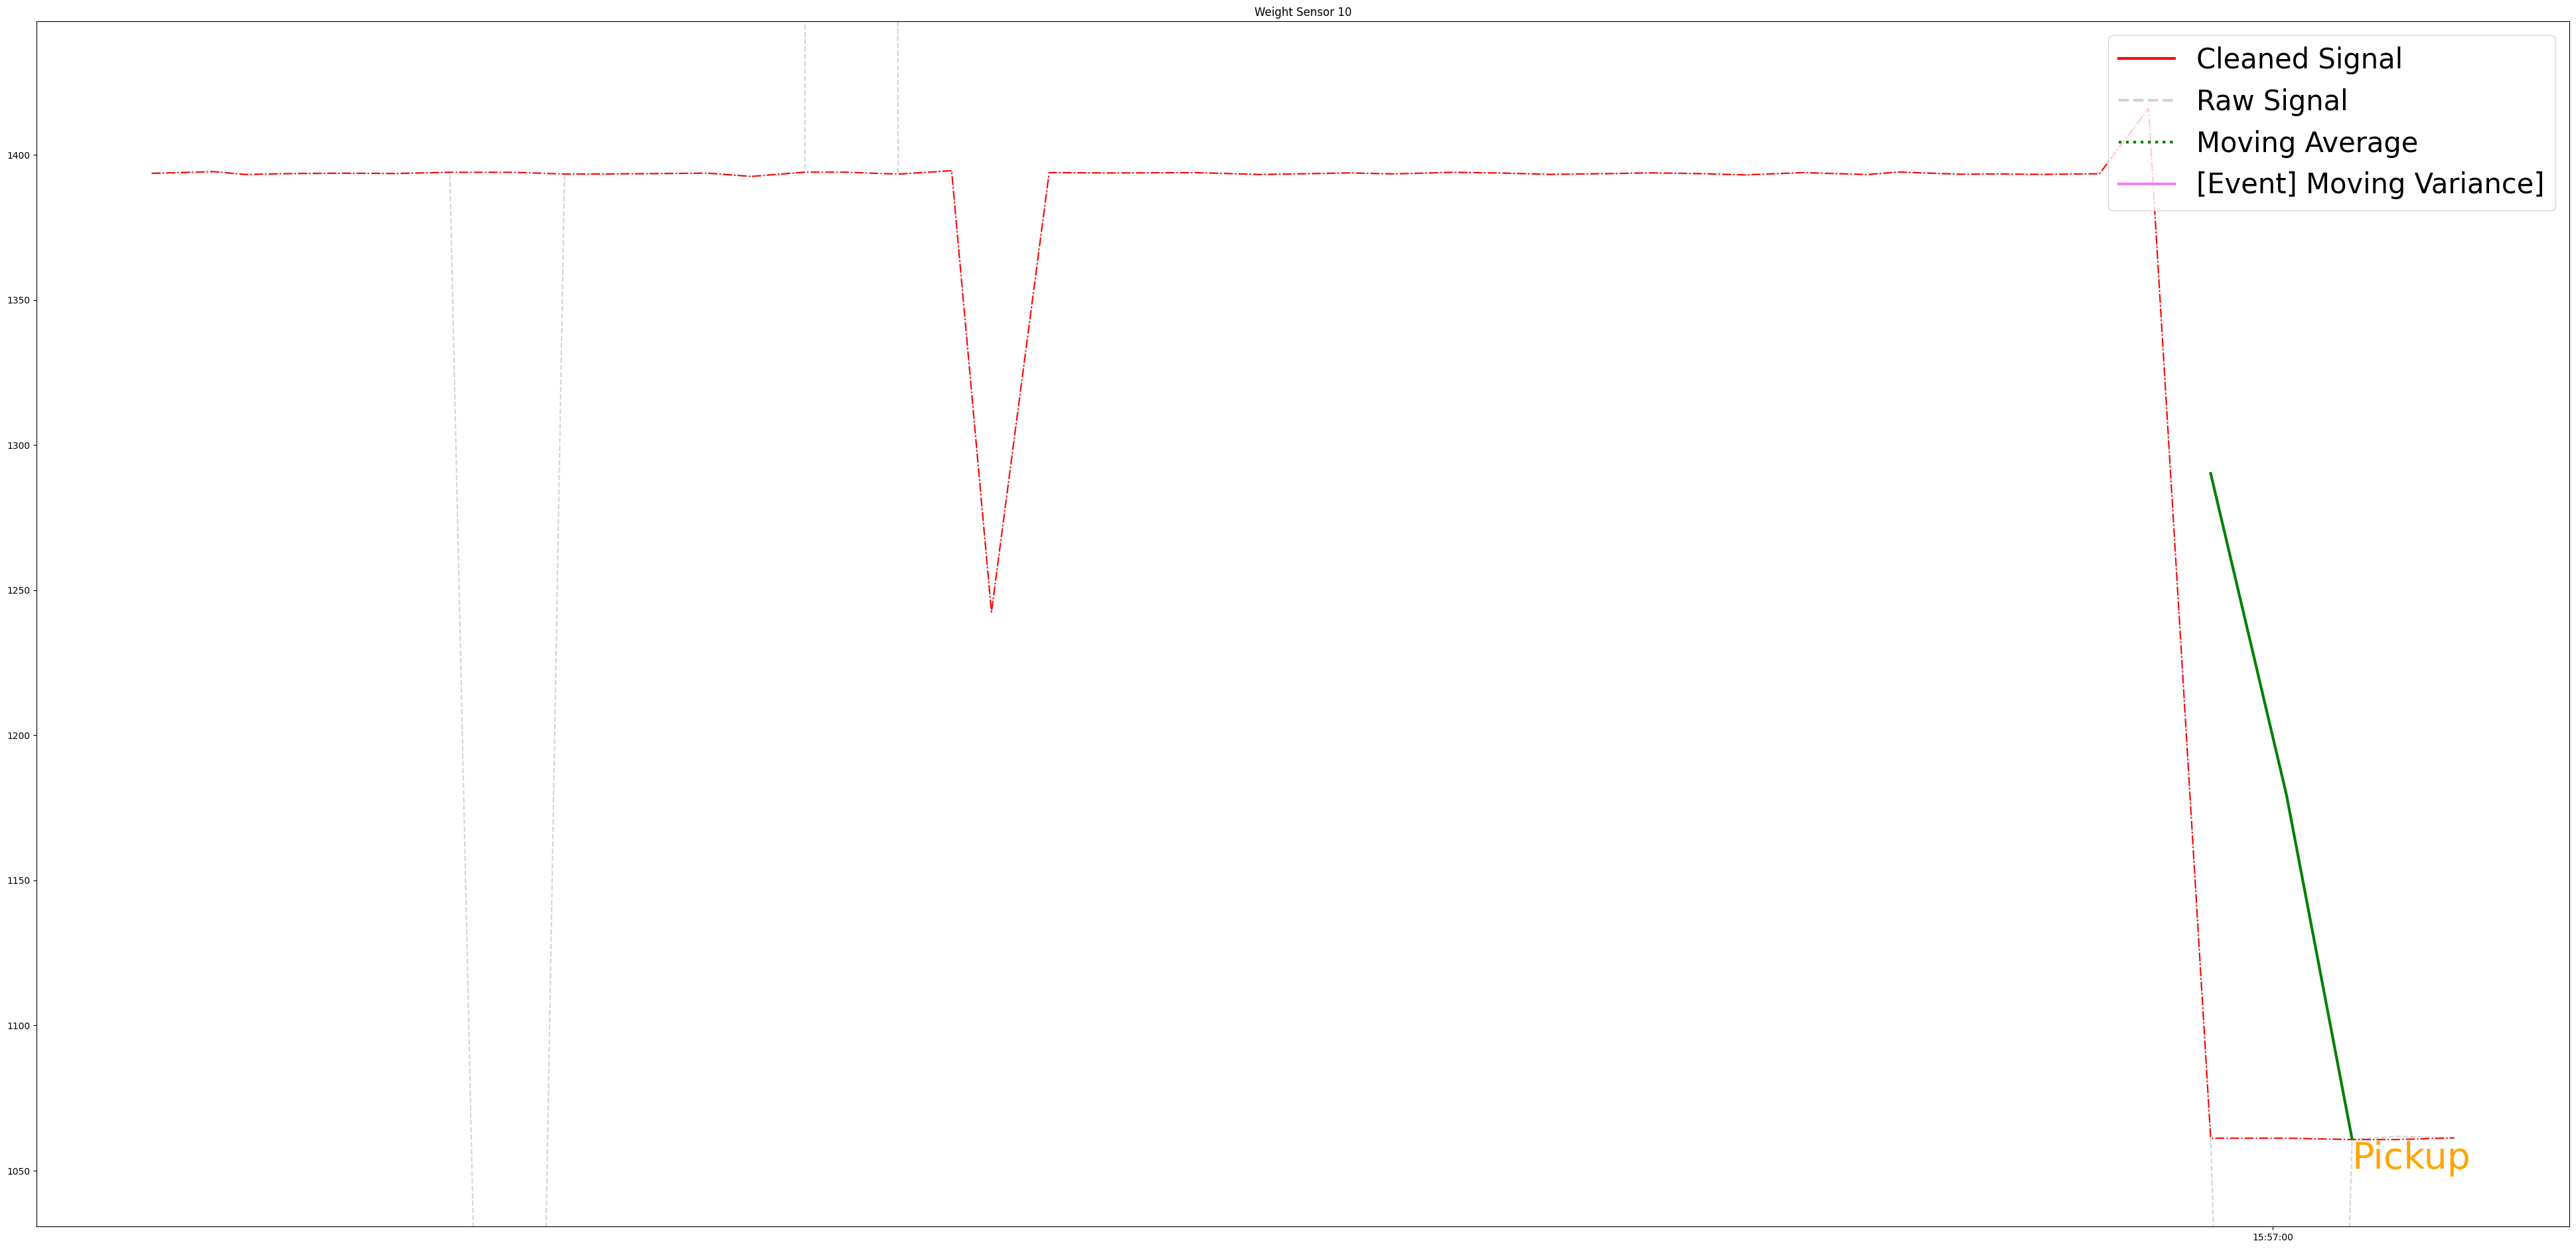

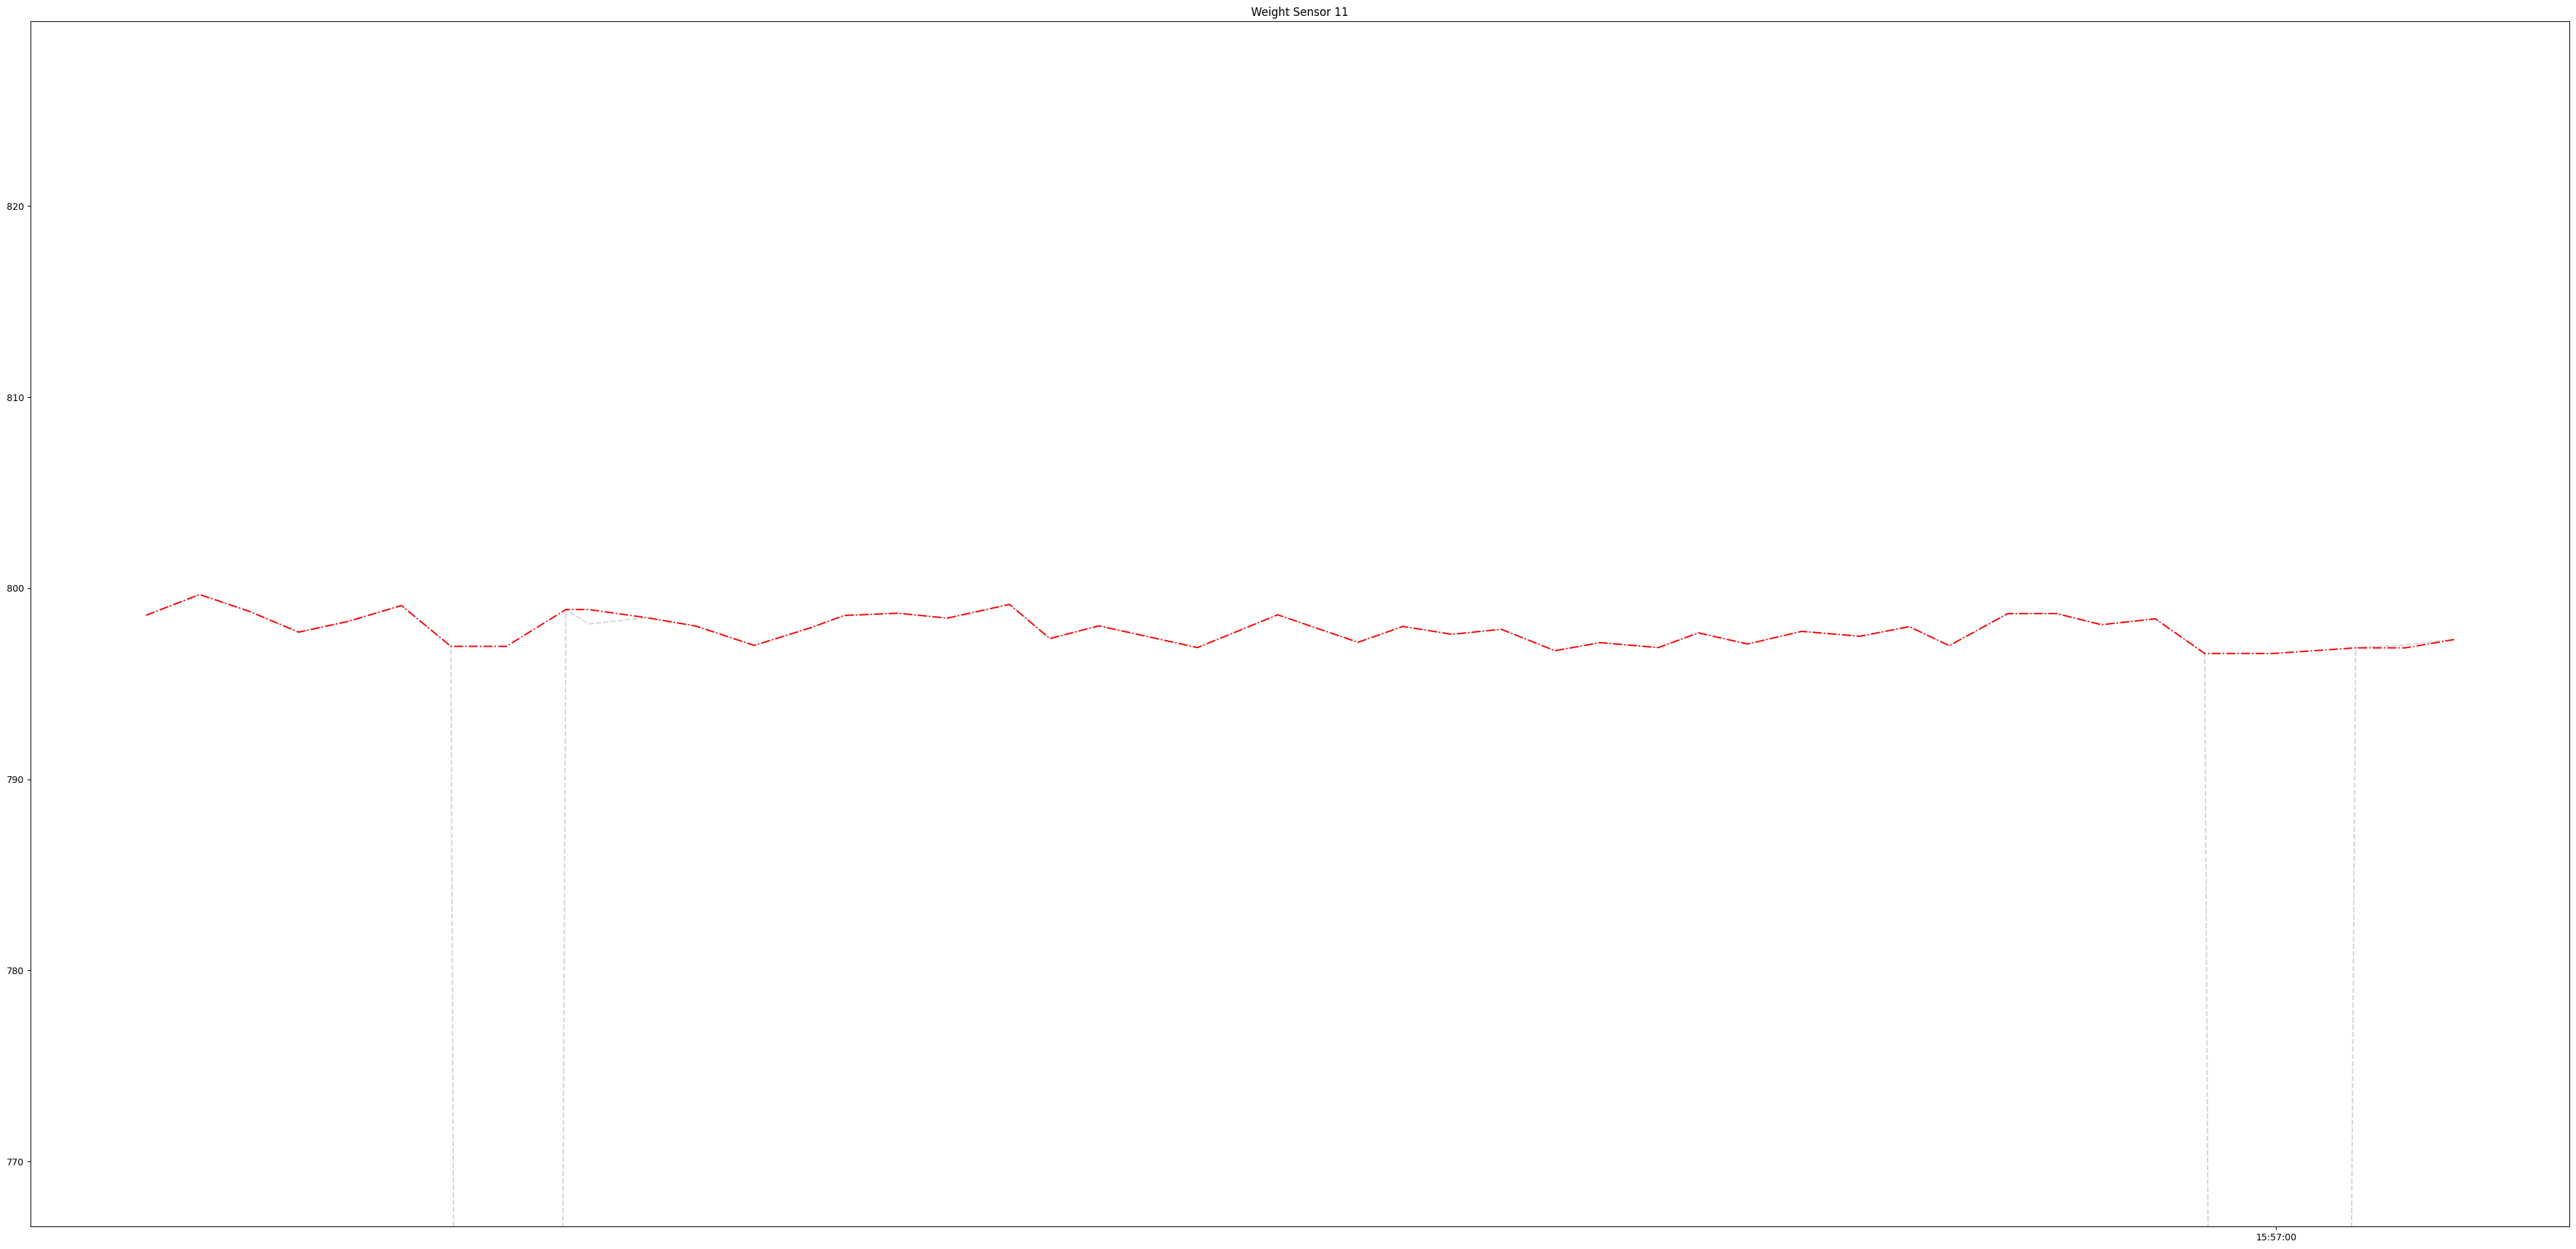

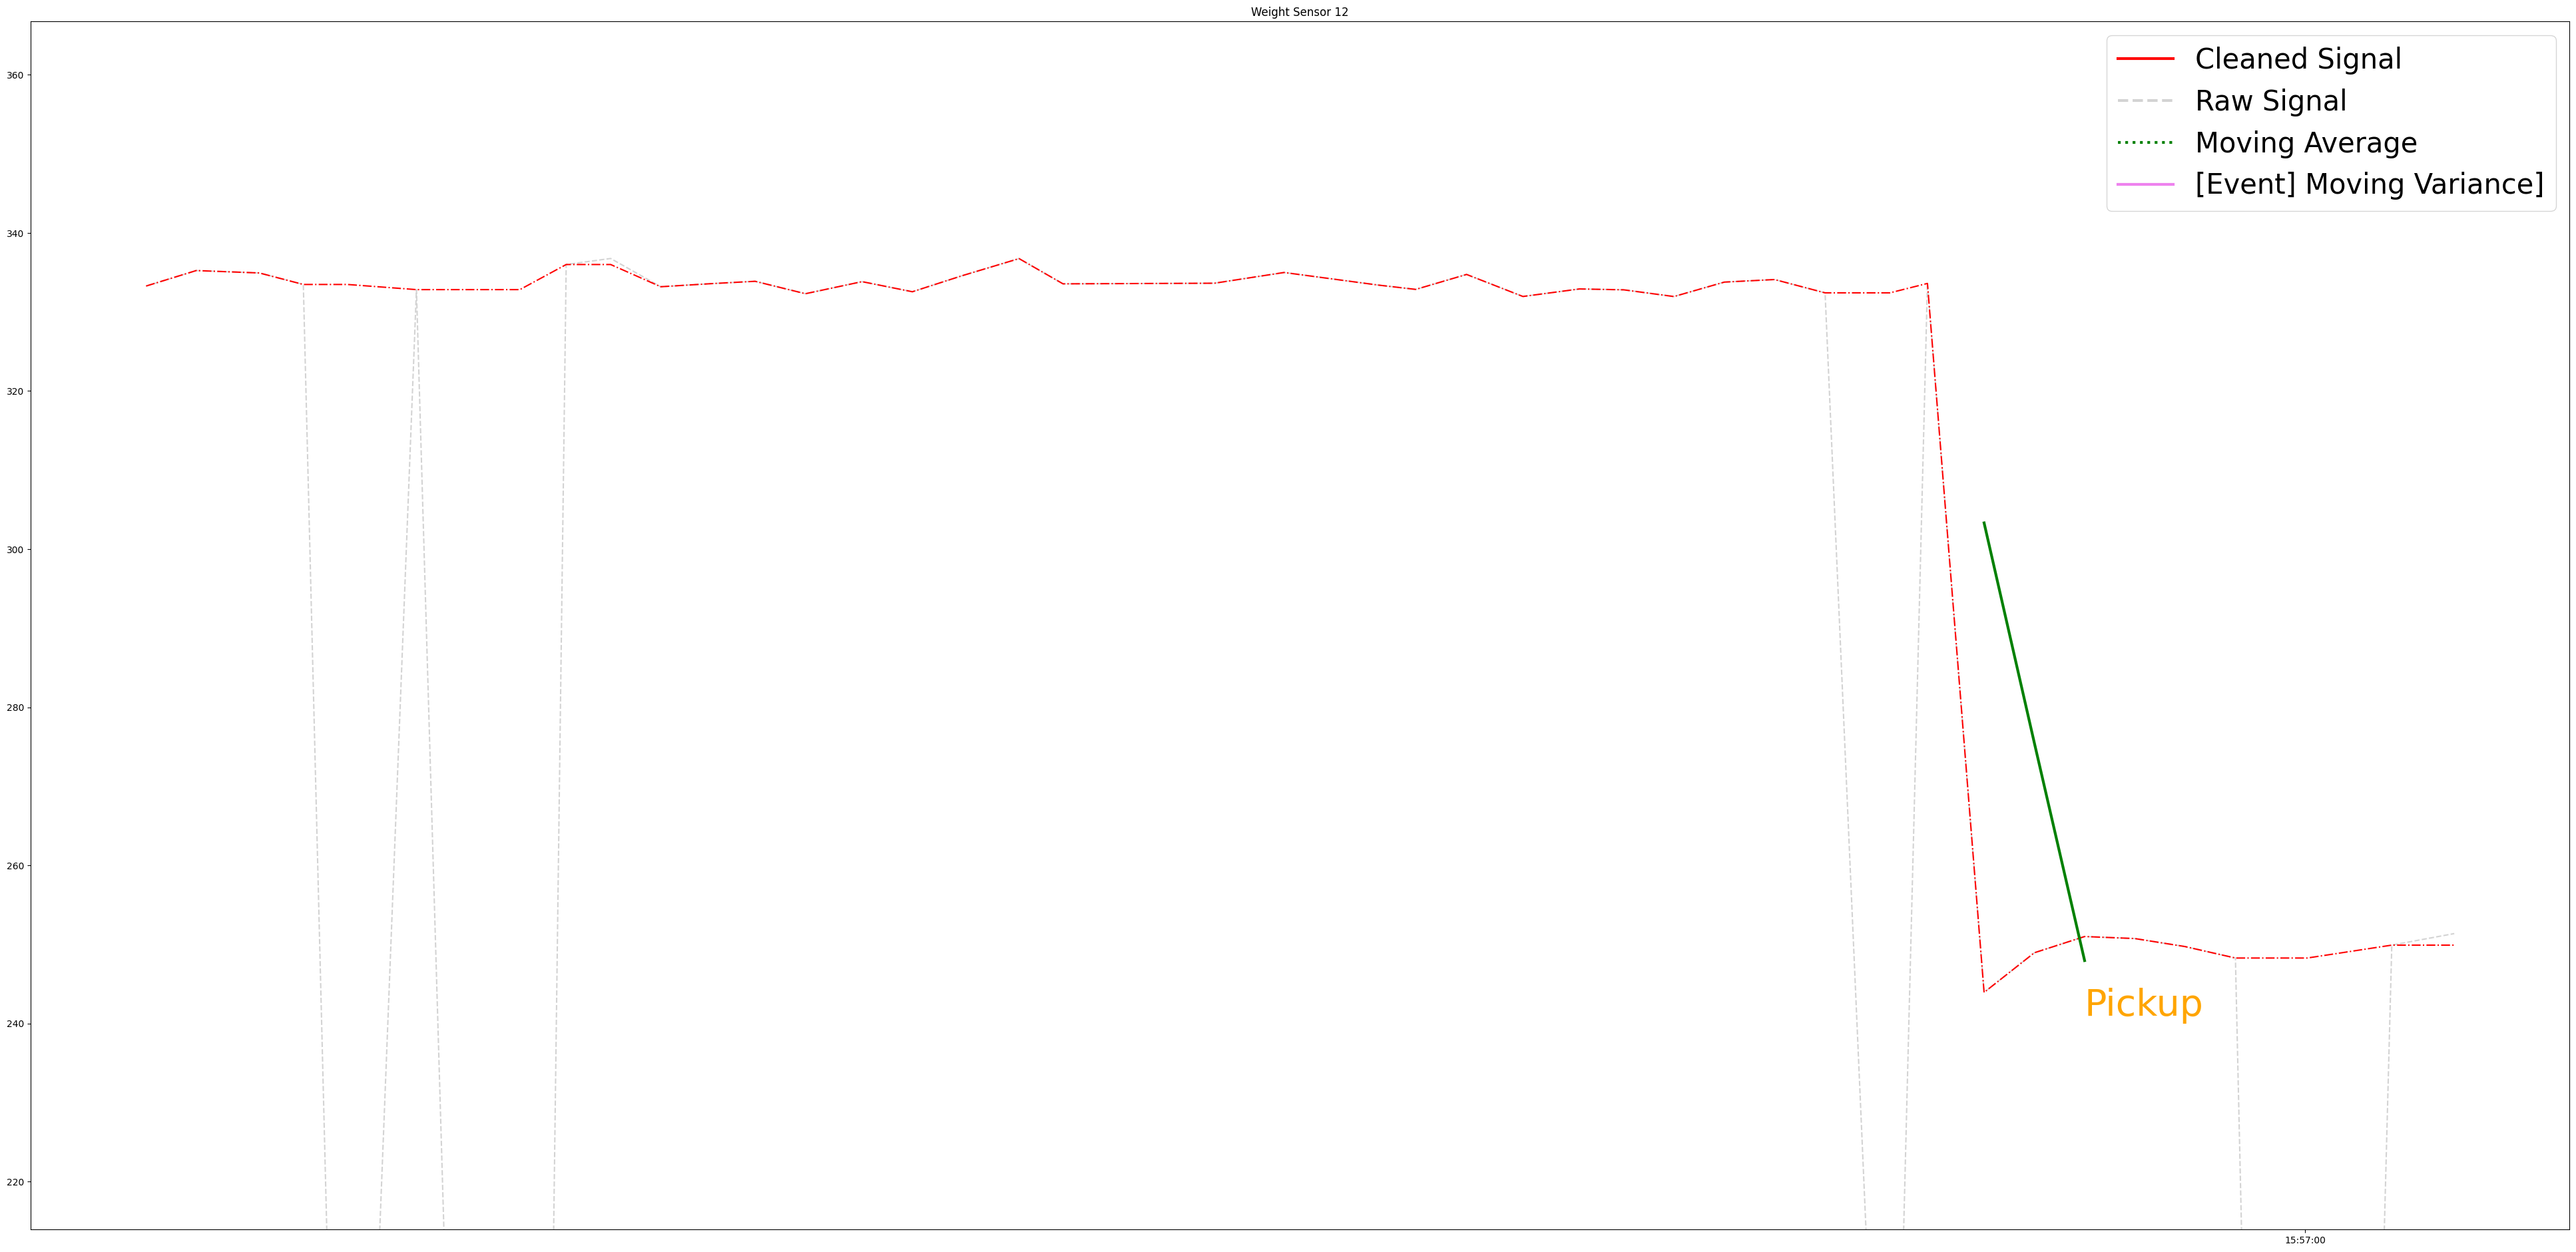

In [10]:
# plt.figure(figsize=(20,30)) # Turn on for Subplot || Turnoff

spikeThreshold=[60,49.5,52.5,48,42,63,400,300,82.5,495,300,120]

for i in range(12):
    # INITIALIZATION
    plt.figure(figsize=(40,20)) #Turn on for Individual plot || Turnoff
    # plt.subplot(12,1,i+1) #Turn On for Subplot || Turnoff
    
    # Uncomment if you guys want to "disregard" peak noises. (For Visualization purposes)
    # plt.ylim(-100,400)
    
    #######  Original Data
    ## Pre-Processing Start
    dfWeightSensor = weightSensor[i][0] 
    weightValue = weightSensor[i][0]['weightValue']
    dateTime = weightSensor[i][0]['dateTime']

    # weightValue = weightValue.astype(str)
    weightSensorOriginal = weightValue.replace('False ',0).astype(float)
    weightSensorOriginal = weightSensorOriginal.replace('False',0).astype(float)
    weightSensorOriginal = weightSensorOriginal.replace('FALSE',0).astype(float)
    weightSensorOriginal = weightSensorOriginal.replace(False,0).astype(float)
    # weightSensorOriginal = weightSensorOriginal.astype(np.float64)
    
    ## Pre-Processing End
    # plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%M:%S'))
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M:%S'))
    plt.gca().xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=2))
    # plt.gcf().autofmt_xdate()
    # plt.plot_date(dateTime,weightSensorOriginal,'--b')
    plt.plot_date(dateTime,weightSensorOriginal,'--',color='lightgray')

    plt.gca().title.set_text(f"Weight Sensor {i+1}")
    plt.gcf().tight_layout(pad=5)


    ####### Clean False Data
    weightValue = weightValue.mask(weightValue.eq("False ")).ffill().astype(float)
    weightValue = weightValue.mask(weightValue.eq("False")).ffill().astype(float)
    weightValue = weightValue.mask(weightValue.eq("FALSE")).ffill().astype(float)
    # weightValue = weightValue.replace(np.inf,np.nan,inplace=True)
    # weightValue = weightValue.replace(-np.inf,np.nan,inplace=True)
    weightValue = weightValue.fillna(method='pad')


    # plt.plot_date(dateTime,weightValue,'-',color='b')

    ####### Clean Voltage Spikes
    # spikeThreshold=420
    weightValue = weightValue.mask(weightValue.gt(weightValue.shift(periods=2)+spikeThreshold[i])).ffill() # 200 can be pre-defined to other individual specific values in the future
    weightValue = weightValue.mask(weightValue.lt(weightValue.shift(periods=2)-spikeThreshold[i])).ffill() # 200 can be pre-defined to other individual specific values in the future
    weightValue = weightValue.mask(weightValue.lt(0)).ffill()
    plt.plot_date(dateTime,weightValue,'-.r')
    
    # For Visualization Purposes
    try:
        plt.ylim(min(weightValue)-30,max(weightValue)+30)
    except Exception as e:
        weightValue = weightValue.dropna()
        plt.ylim(min(weightValue)-30,max(weightValue)+30)
    
    weightSensor[i][0].loc[:,'ma'] = weightValue.rolling(window=3,min_periods=2).mean()     
    weightSensor[i][0].loc[:,'mv'] = weightValue.rolling(window=3,min_periods=2).var(ddof=0)

    # Moving Variance
    # plt.plot(dateTime,dfWeightSensor['mv'],'-',color='violet')
    
    # Remerge
    weightSensor[i][0].loc[:,'weightValue'] = weightValue
    weightSensor[i][0].loc[:,'dateTime'] = dateTime

    # Threshold set || Arbitrary based on Sensor Observations
    weight1Threshold = float(100)
    weight2Threshold = float(100)
    weight3Threshold = float(100)
    weight4Threshold = float(100)
    weight5Threshold = float(50)
    weight6Threshold = float(7000) ## Changed mv threshold (from around 200)
    weight7Threshold = float(1000 )## Changed mv threshold (from around 200)
    weight8Threshold = float(200)
    weight9Threshold = float(200)
    weight10Threshold = float(8000) ## Changed mv threshold (from 200)
    weight11Threshold = float(200)
    weight12Threshold = float(200)
    threshold = [weight1Threshold, weight2Threshold, weight3Threshold, weight4Threshold, weight5Threshold, weight6Threshold, weight7Threshold, weight8Threshold, weight9Threshold, weight10Threshold, weight11Threshold, weight12Threshold]
    weightSensor[i][0].loc[:,'Event'] = dfWeightSensor['mv']>threshold[i]
    df_event_series = list(dfWeightSensor['Event'])

    # Set || Pre-Defined
    sliding_window = 1
    Event_Start_Array = []
    Event_End_Array = []
    cnt = []
    k = 0
    event_array = []
    Event_Start_datetime_Array = []
    Event_End_datetime_Array = []
    event_array_datetime = []
    
    # Event Detection
    while(k<= len(df_event_series)-sliding_window):
        cnt.append(k)

        if df_event_series[k:k+sliding_window].count(True)==sliding_window:
            Event_Start_Array.append(k)
            Event_Start = k
            Event_Start_datetime_Array.append(dfWeightSensor.iloc[k]['endTime'])

            for j in range(k+sliding_window,len(df_event_series)):
                if df_event_series[j:j+sliding_window].count(False)==sliding_window:
                    Event_End_Array.append(j+sliding_window)
                    Event_End = j+sliding_window
                    # Event_End_datetime_Array.append(dfWeightSensor.iloc[j+sliding_window]['endTime'])
                    try:
                        Event_End_datetime_Array.append(dfWeightSensor.iloc[j+sliding_window]['endTime'])
                    except:
                        Event_End_datetime_Array.append(dfWeightSensor.iloc[j]['endTime'])
                    break
                else:
                    k+=1
            
            if Event_End > Event_Start:
                event_array.append([Event_Start,Event_End])
                # event_array_datetime.append([Event_Start_datetime_Array,Event_End_datetime_Array])
                k=Event_End
            else:
                k+=1
        else:
            k+=1

    k=0
    
    # Plotting of Event Detection
    if len(event_array)!=0:
        x2_date = []
        for i in range(len(event_array)):
            # x2 = list(i for i in range(event_array[i][0],event_array[i][1]))
            # for i in x2:
            #     x2_date.append(df.iloc[i]['endTime'])

            x2_date = list(dfWeightSensor.iloc[event_array[i][0]: event_array[i][1]]['endTime'])
            y2 = list(dfWeightSensor.iloc[event_array[i][0]: event_array[i][1]]['ma'])

            # plt.plot(x2,y2,'.g',linewidth=.35) 
            
            # for i in range(event_array[i][0],event_array[i][1]):
            #     x2 = list(i)    

            # x2 = list(i for i in range(event_array_datetime[i][0],event_array_datetime[i][1]))
            # y2 = list(df.iloc[event_array_datetime[i][0]: event_array_datetime[i][1]]['ma'])
            
            x2_date_num = matplotlib.dates.date2num(x2_date)
            plt.plot_date(x2_date_num,y2,'-g',linewidth=3) 
            # plt.plot_date(x2_date_num,y2,'-g',linewidth=.35) 
            
            # plt.plot_date(x2,y2)

            # Start Event End Event Annotation 
            # plt.annotate("Start Event",xy=(x2_date_num[0],y2[0]),fontsize=25)
            # plt.annotate("End Event",xy=(x2_date_num[len(x2_date_num)-1],y2[len(y2)-1]),fontsize=25)

            if y2[-1] < y2[0]-0:
                dfWeightSensor.loc[dfWeightSensor['endTime'].eq(x2_date[-1]),'Action']='Pickup'
                try:
                    weightSensor[i][0].loc[weightSensor[i][0]['endTime'].eq(x2_date[-1]),'Action']='Pickup'
                except:
                    pass
                PickupTime = dfWeightSensor.loc[dfWeightSensor['endTime'].eq(x2_date[-1])]['endTime']
                PickupValue = dfWeightSensor.loc[dfWeightSensor['endTime'].eq(x2_date[-1])]['weightValue']
                plt.annotate("Pickup",xy=(PickupTime,PickupValue-10),fontsize=40,color='orange')
            
            elif y2[-1] > y2[0]+0:
                dfWeightSensor.loc[dfWeightSensor['endTime'].eq(x2_date[-1]),'Action']='Putback'
                try:
                    weightSensor[i][0].loc[weightSensor[i][0]['endTime'].eq(x2_date[-1]),'Action']='Putback'
                except:
                    pass
                PutbackTime = dfWeightSensor.loc[dfWeightSensor['endTime'].eq(x2_date[-1])]['endTime']
                PutbackValue = dfWeightSensor.loc[dfWeightSensor['endTime'].eq(x2_date[-1])]['weightValue']
                plt.annotate("Putback",xy=(PutbackTime,PutbackValue+10),fontsize=40,color='blue')
            
            # else:
            #     dfWeightSensor.loc[dfWeightSensor['endTime'].eq(x2_date[-1]),'Action']=np.nan
            #     weightSensor[i][0].loc[weightSensor[i][0]['endTime'].eq(x2_date[-1]),'Action']=np.nan

            #     PutbackTime = dfWeightSensor.loc[dfWeightSensor['endTime'].eq(x2_date[-1])]['endTime']
            #     PutbackValue = dfWeightSensor.loc[dfWeightSensor['endTime'].eq(x2_date[-1])]['weightValue']
            #     plt.annotate("No Action",xy=(PutbackTime,PutbackValue+10),fontsize=20,color='green')

            legend_elements = [ Line2D([0],[0], linestyle='-', color='red',lw=3, label='Cleaned Signal'),
                                    Line2D([0],[0], linestyle='--', color='lightgray',lw=3, label='Raw Signal'),
                                        Line2D([0],[0], linestyle='dotted', color='green',lw=3, label='Moving Average'),
                                            Line2D([0],[0], linestyle='-', color='violet',lw=3, label='[Event] Moving Variance]')]
            
            plt.legend(handles=legend_elements, loc='upper right',prop={'size':30})
    
    # plt.savefig(f'./{filename.split(".")[0]}/Plot_Result_Figure_'+str(i+1), facecolor='w')
        # plt.xlim(min(dfWeightSensor.iloc[event_array[i][0]]['endTime']), max(x2_date[dfWeightSensor.iloc[event_array[i][1]]['endTime']]))
    

df_results = pd.DataFrame()

for i in range(12):
    df_results = df_results.append(weightSensor[i][0])
    # plt.savefig(f'./{filename.split(".")[0]}/Plot_Resulst_Figure_'+str(i+1), facecolor='w')

# df_results.to_csv('./RawEventResults.csv')
    # plt.savefig('./Plot_Results_Figure'+str(i+1))
    # plt.show()

## Saving Results for only w/ Actions
df_results.loc[:,'Action'] = df_results.loc[:,'Action'].astype(str)
df_results = df_results.loc[df_results['Action'].ne("nan")]
df_results.to_csv('/Users/cjbertumen/Desktop/Prototype Demonstration/Weight-Event-Results.csv')

In [11]:
df_results[df_results['sensorNumber'].eq(11)]

,startTime,endTime,sensorLocation,sensorNumber,weightValue,dateTime,ma,mv,Event,Action


In [12]:
df_csv[df_csv['sensorNumber'].eq(11) & df_csv['startTime'].ge('2023-10-19 13:45:39.000509') & df_csv['startTime'].le('2023-10-19 13:45:46.764320') ]

,startTime,endTime,sensorLocation,sensorNumber,weightValue,dateTime


In [13]:
weightSensor[10][0][df_csv['sensorNumber'].eq(11) & df_csv['startTime'].ge('2023-10-19 13:45:39.000509') & df_csv['startTime'].le('2023-10-19 13:45:46.764320') ]

/var/folders/kg/5gxzvb091vs8gx59d2qh6qp40000gn/T/ipykernel_50244/3486304360.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weightSensor[10][0][df_csv['sensorNumber'].eq(11) & df_csv['startTime'].ge('2023-10-19 13:45:39.000509') & df_csv['startTime'].le('2023-10-19 13:45:46.764320') ]


,startTime,endTime,sensorLocation,sensorNumber,weightValue,dateTime,ma,mv,Event


In [14]:
weightSensor[10][0].iloc[775:801]

,startTime,endTime,sensorLocation,sensorNumber,weightValue,dateTime,ma,mv,Event
